In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import scipy

In [2]:
df = pd.read_csv('Data/mobile_price_classification.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()

0

- Không có dữ liệu bị thiếu và bị trùng

In [7]:
df_in_numeric = df[['battery_power', 'clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]
df_in_catogory = df[['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']]
df_out = df['price_range']# output là catogory

In [8]:
df_in_numeric.head(2)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7


In [9]:
df_in_catogory.head(2)

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0,0,0,2,0,0,1
1,1,1,1,3,1,1,0


In [10]:
df_out.value_counts() # Không có hiện tượng imbalance

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Phân tích đơn biến catogory 

In [11]:
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()

Class count of blue:

0    1010
1     990
Name: blue, dtype: int64


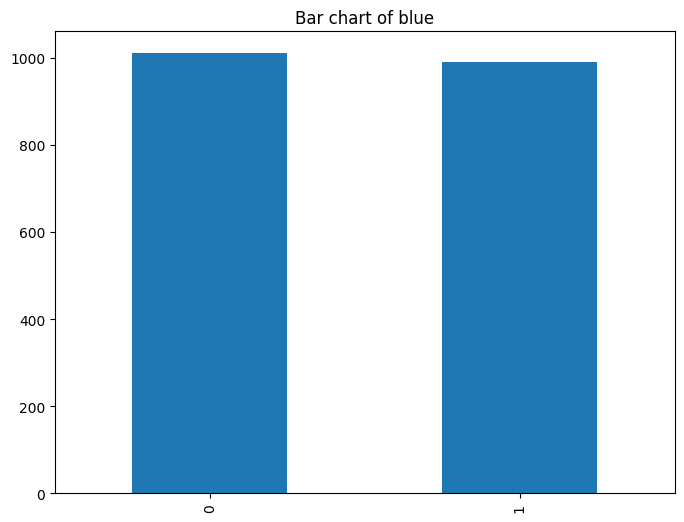

Class count of dual_sim:

1    1019
0     981
Name: dual_sim, dtype: int64


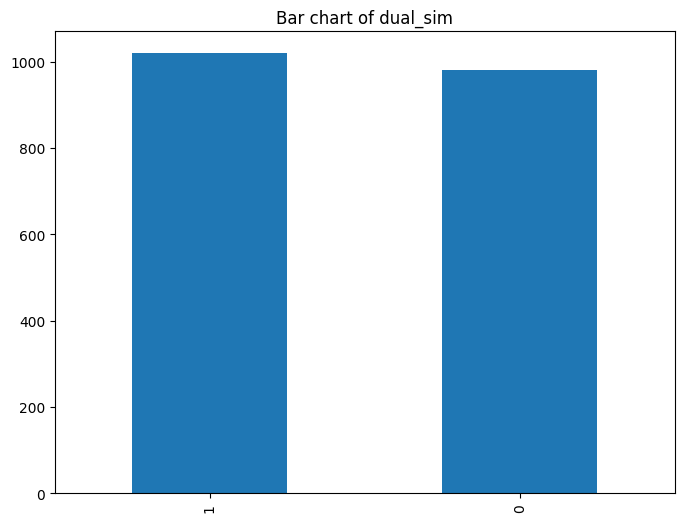

Class count of four_g:

1    1043
0     957
Name: four_g, dtype: int64


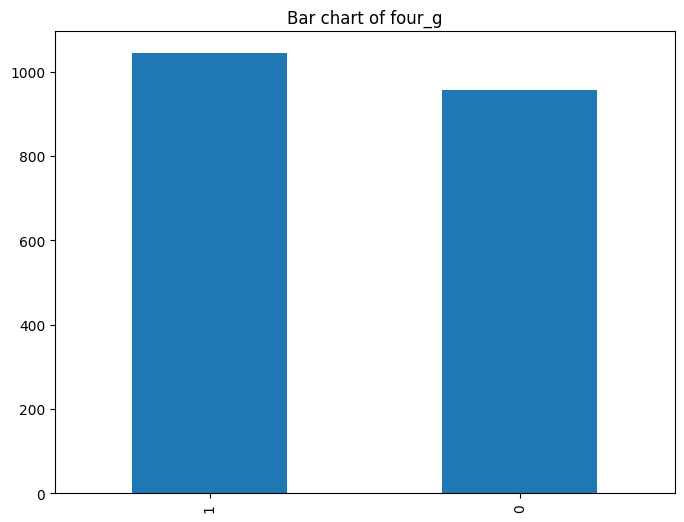

Class count of n_cores:

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64


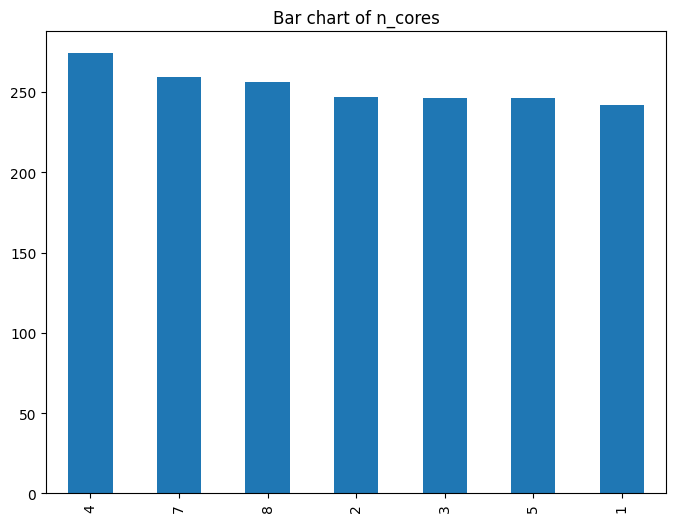

Class count of three_g:

1    1523
0     477
Name: three_g, dtype: int64


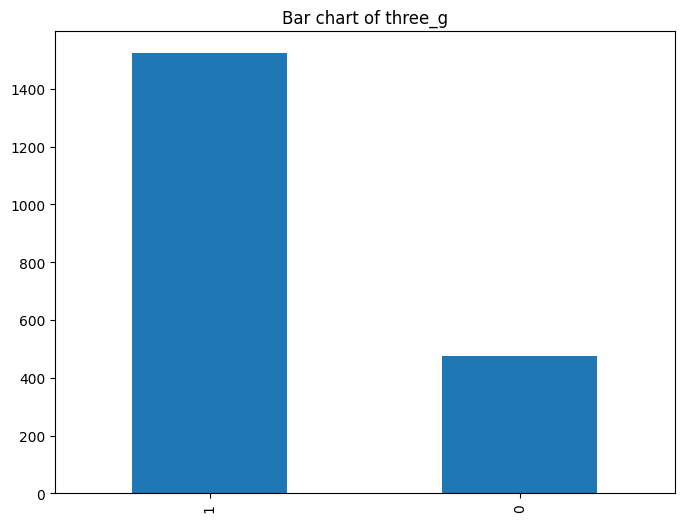

Class count of touch_screen:

1    1006
0     994
Name: touch_screen, dtype: int64


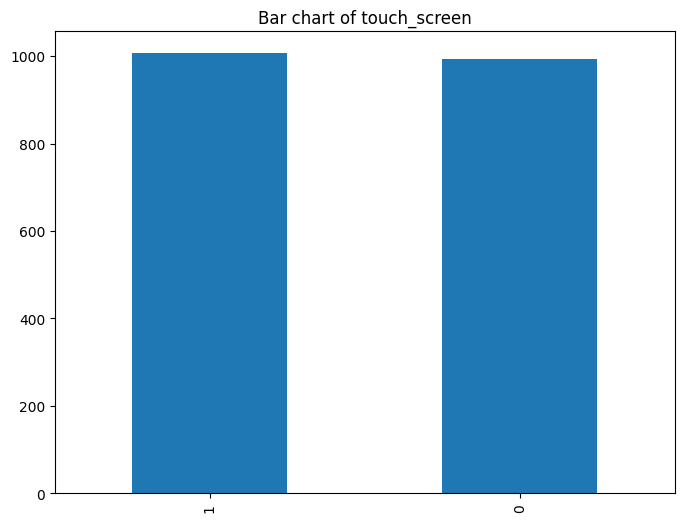

Class count of wifi:

1    1014
0     986
Name: wifi, dtype: int64


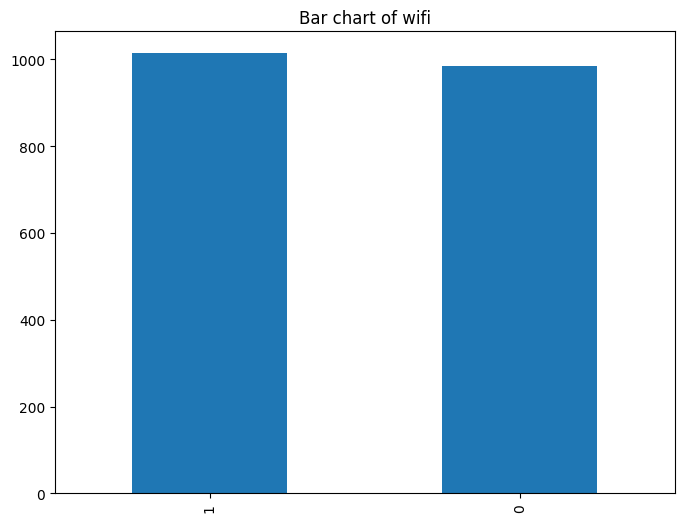

In [12]:
for i in df_in_catogory.columns:
    _analyzer.analyze_category_variable(i, df_in_catogory)

Class count of price_range:

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


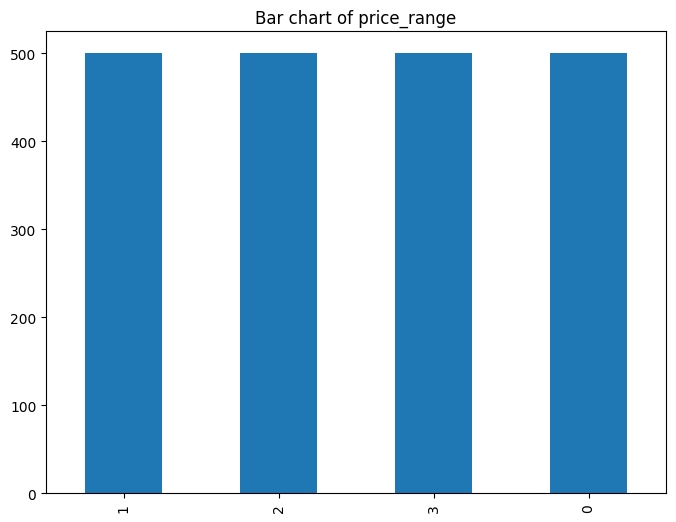

In [13]:
_analyzer.analyze_category_variable('price_range', df)

Nhận xét: 
- Đa số các biến phân loại không chêch lệch nhau đáng kể (khoảng 100), trừ biến 'three_g' (chêch lệch 1046, 1 > 0)
- Output không có hiện tượng imbalance

## Phân tích đơn biến numeric

=====
central tendency of battery_power: {'mean': 1238.5185, 'median': 1226.0, 'mode': 618, 'min': 501, 'max': 1998, 'range': 1497}
=====
Dispersion of battery_power: 
 {'range': 1497, 'q1': 851.75, 'q3': 1615.25, 'iqr': 763.5, 'var': 193088.35983766883, 'skew': 0.03189847179278164, 'kurtosis': -1.2241438831965528}
=====


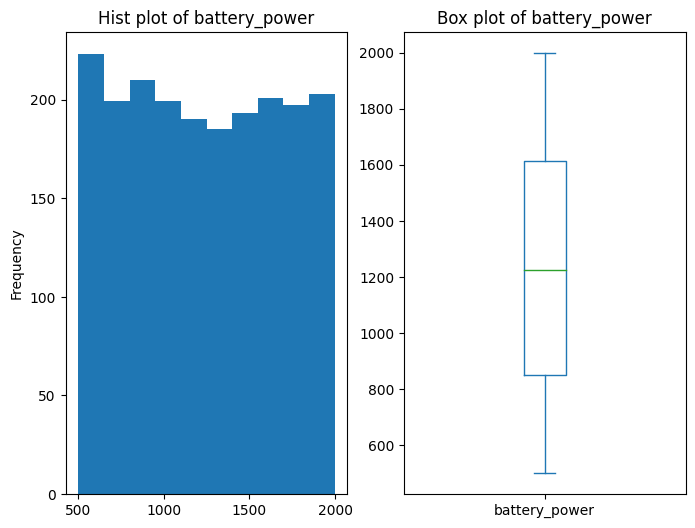

=====
central tendency of clock_speed: {'mean': 1.52225, 'median': 1.5, 'mode': 0.5, 'min': 0.5, 'max': 3.0, 'range': 2.5}
=====
Dispersion of clock_speed: 
 {'range': 2.5, 'q1': 0.7, 'q3': 2.2, 'iqr': 1.5000000000000002, 'var': 0.6658628689344672, 'skew': 0.1780841202790887, 'kurtosis': -1.3234172221019123}
=====


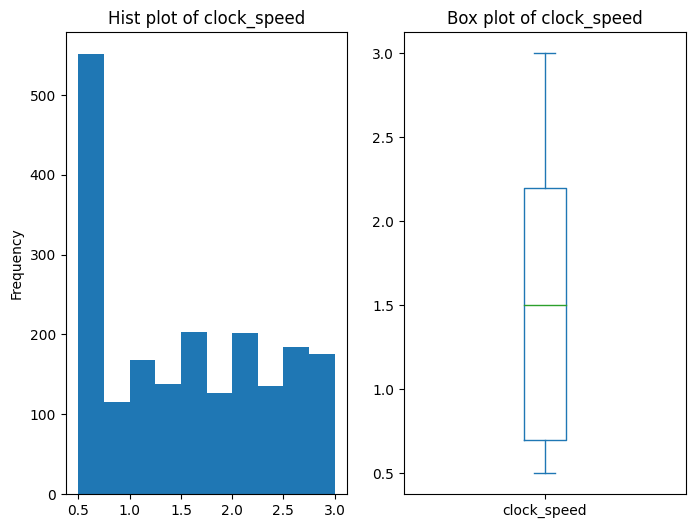

=====
central tendency of fc: {'mean': 4.3095, 'median': 3.0, 'mode': 0, 'min': 0, 'max': 19, 'range': 19}
=====
Dispersion of fc: 
 {'range': 19, 'q1': 1.0, 'q3': 7.0, 'iqr': 6.0, 'var': 18.848133816908447, 'skew': 1.0198114105315519, 'kurtosis': 0.2770763245651877}
=====


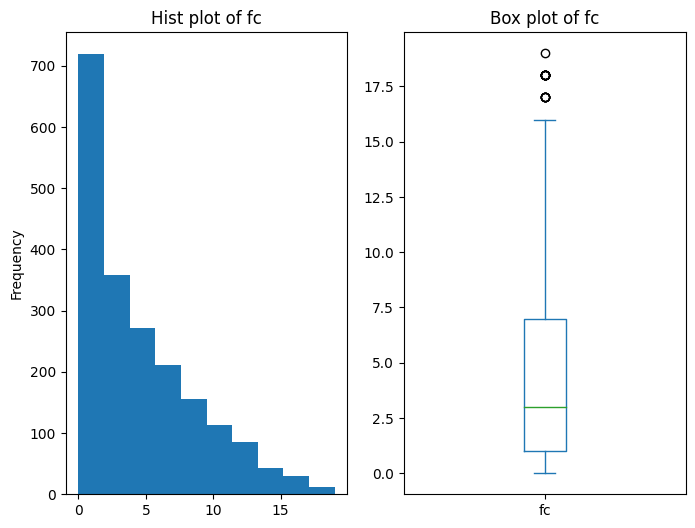

=====
central tendency of int_memory: {'mean': 32.0465, 'median': 32.0, 'mode': 27, 'min': 2, 'max': 64, 'range': 62}
=====
Dispersion of int_memory: 
 {'range': 62, 'q1': 16.0, 'q3': 48.0, 'iqr': 32.0, 'var': 329.2669712356178, 'skew': 0.05788932785206039, 'kurtosis': -1.2160740301516093}
=====


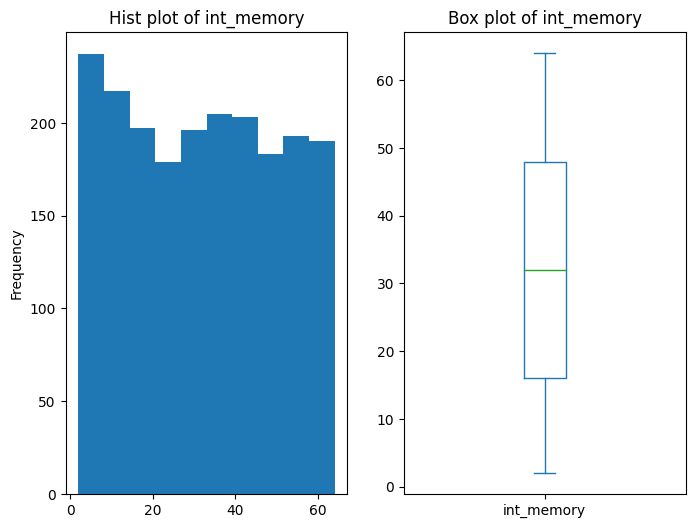

=====
central tendency of m_dep: {'mean': 0.50175, 'median': 0.5, 'mode': 0.1, 'min': 0.1, 'max': 1.0, 'range': 0.9}
=====
Dispersion of m_dep: 
 {'range': 0.9, 'q1': 0.2, 'q3': 0.8, 'iqr': 0.6000000000000001, 'var': 0.08318352926463232, 'skew': 0.08908200979245855, 'kurtosis': -1.2743488835633268}
=====


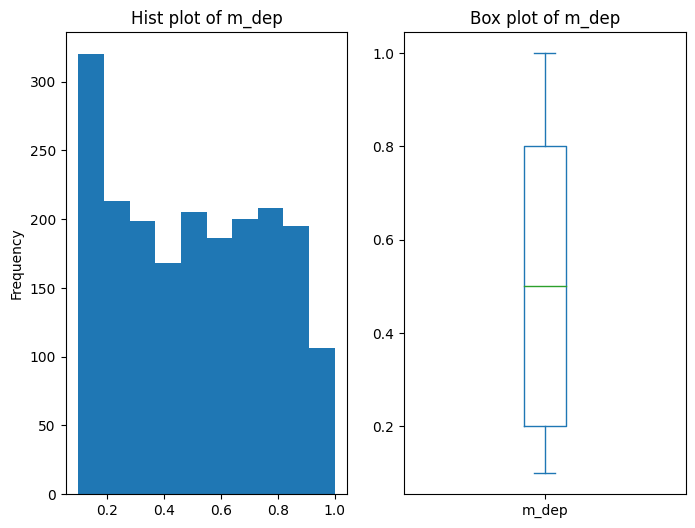

=====
central tendency of mobile_wt: {'mean': 140.249, 'median': 141.0, 'mode': 182, 'min': 80, 'max': 200, 'range': 120}
=====
Dispersion of mobile_wt: 
 {'range': 120, 'q1': 109.0, 'q3': 170.0, 'iqr': 61.0, 'var': 1253.1355667833916, 'skew': 0.006558157428692449, 'kurtosis': -1.2103764737553446}
=====


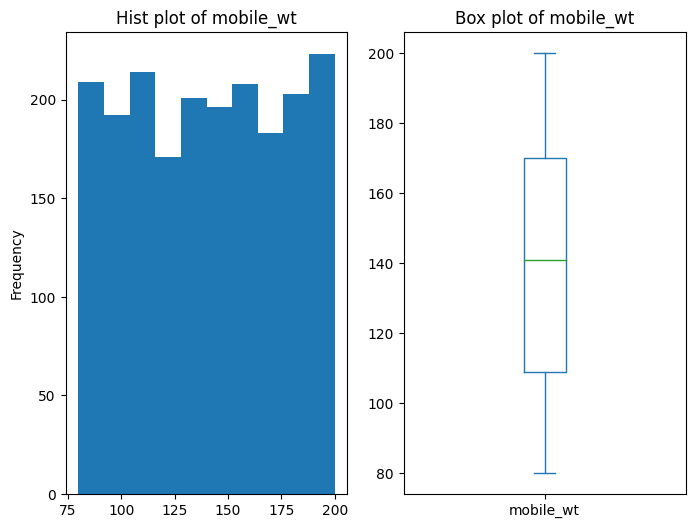

=====
central tendency of pc: {'mean': 9.9165, 'median': 10.0, 'mode': 10, 'min': 0, 'max': 20, 'range': 20}
=====
Dispersion of pc: 
 {'range': 20, 'q1': 5.0, 'q3': 15.0, 'iqr': 10.0, 'var': 36.775915707853926, 'skew': 0.017306150471392553, 'kurtosis': -1.1714987948421944}
=====


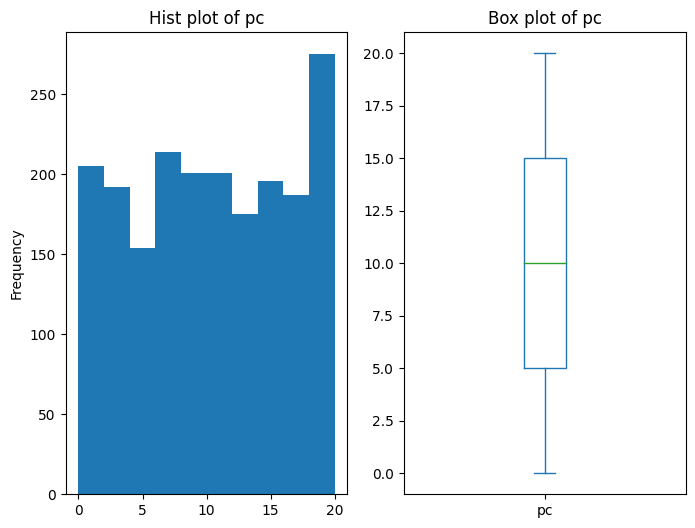

=====
central tendency of px_height: {'mean': 645.108, 'median': 564.0, 'mode': 347, 'min': 0, 'max': 1960, 'range': 1960}
=====
Dispersion of px_height: 
 {'range': 1960, 'q1': 282.75, 'q3': 947.25, 'iqr': 664.5, 'var': 196941.40804002003, 'skew': 0.6662712560691598, 'kurtosis': -0.3158654936040146}
=====


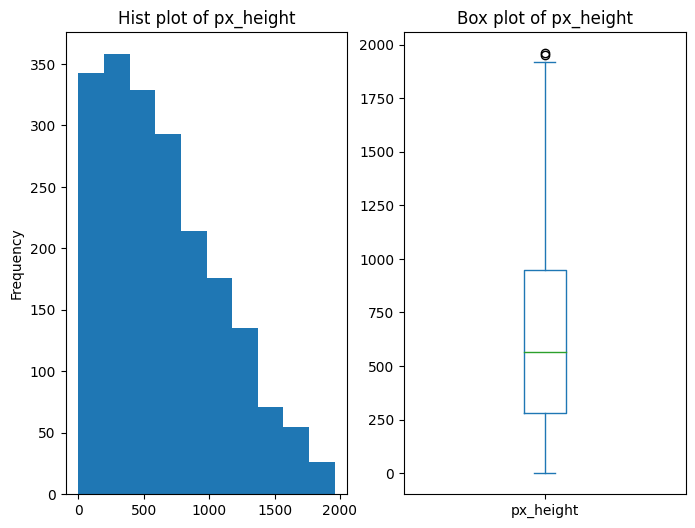

=====
central tendency of px_width: {'mean': 1251.5155, 'median': 1247.0, 'mode': 874, 'min': 500, 'max': 1998, 'range': 1498}
=====
Dispersion of px_width: 
 {'range': 1498, 'q1': 874.75, 'q3': 1633.0, 'iqr': 758.25, 'var': 186796.36194072038, 'skew': 0.014787473768006081, 'kurtosis': -1.186005229243282}
=====


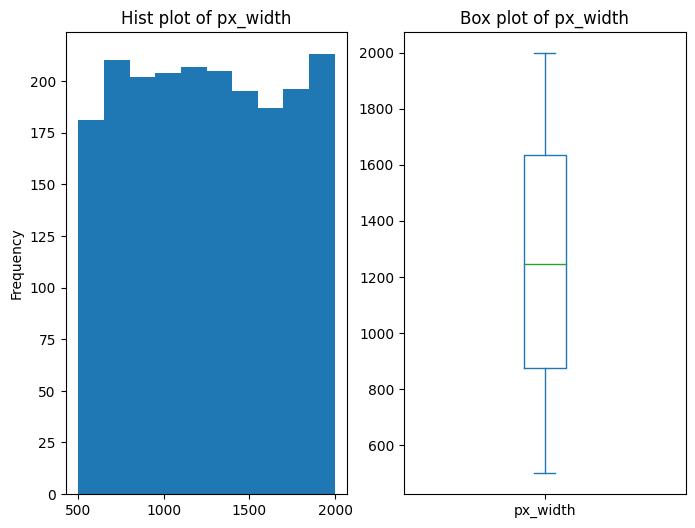

=====
central tendency of ram: {'mean': 2124.213, 'median': 2146.5, 'mode': 1229, 'min': 256, 'max': 3998, 'range': 3742}
=====
Dispersion of ram: 
 {'range': 3742, 'q1': 1207.5, 'q3': 3064.5, 'iqr': 1857.0, 'var': 1176643.6064342172, 'skew': 0.006628035398750348, 'kurtosis': -1.1919130700631546}
=====


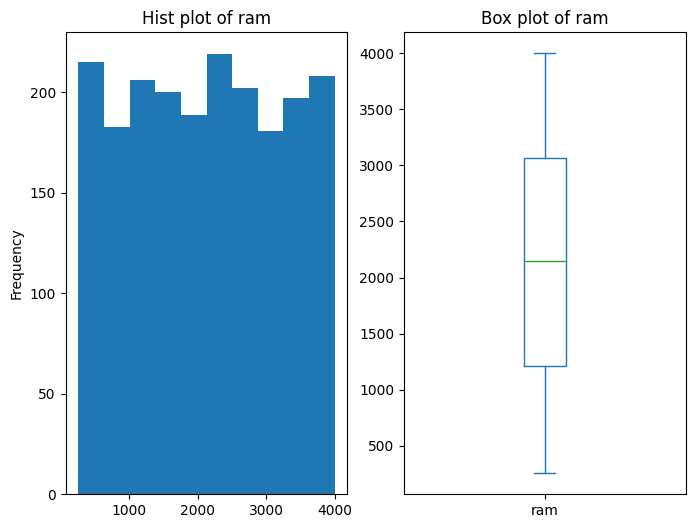

=====
central tendency of sc_h: {'mean': 12.3065, 'median': 12.0, 'mode': 17, 'min': 5, 'max': 19, 'range': 14}
=====
Dispersion of sc_h: 
 {'range': 14, 'q1': 9.0, 'q3': 16.0, 'iqr': 7.0, 'var': 17.751433466733367, 'skew': -0.09888424098283438, 'kurtosis': -1.1907912468413369}
=====


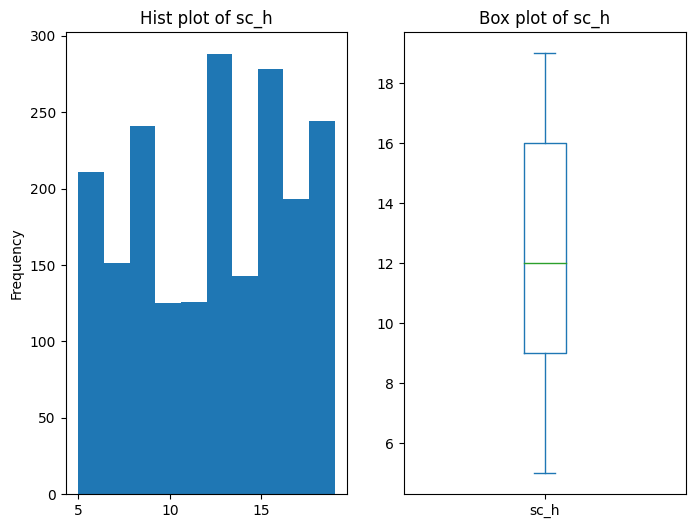

=====
central tendency of sc_w: {'mean': 5.767, 'median': 5.0, 'mode': 1, 'min': 0, 'max': 18, 'range': 18}
=====
Dispersion of sc_w: 
 {'range': 18, 'q1': 2.0, 'q3': 9.0, 'iqr': 7.0, 'var': 18.978200100050028, 'skew': 0.6337870734456067, 'kurtosis': -0.3895227893524629}
=====


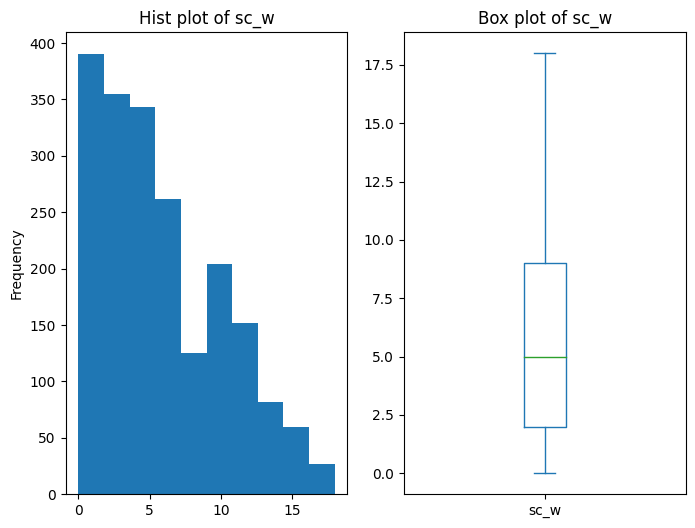

=====
central tendency of talk_time: {'mean': 11.011, 'median': 11.0, 'mode': 7, 'min': 2, 'max': 20, 'range': 18}
=====
Dispersion of talk_time: 
 {'range': 18, 'q1': 6.0, 'q3': 16.0, 'iqr': 10.0, 'var': 29.8548064032016, 'skew': 0.009511762221541457, 'kurtosis': -1.2185909629106917}
=====


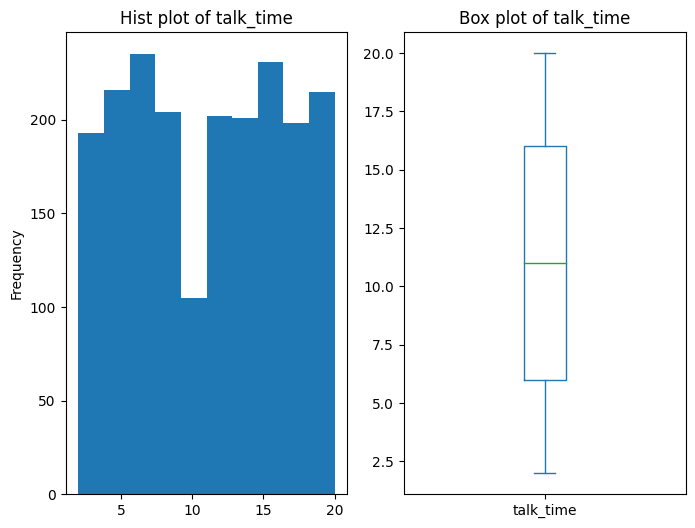

In [14]:
for i in df_in_numeric:
        _analyzer.analyze_numeric_variable(i, df_in_numeric)

Nhận xét:
- Đa số các biến đều là phân phối chuẩn ngoại trừ clock_speed, fc, sc_w hơi lệch phải
- Đa số các biến đều không có outlier ngoại trừ fc, px_height có outlier không đáng kể

## Phân tích đa biến numeric (in - in)

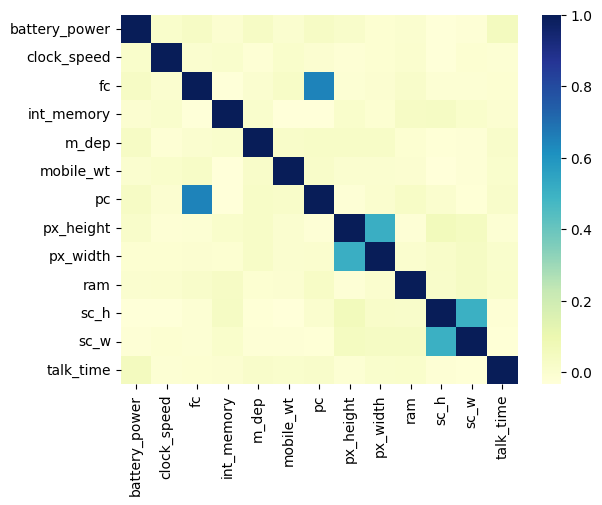

In [15]:
sns.heatmap(df_in_numeric.corr(), cmap='YlGnBu')
plt.show()

Các cặp có quan hệ với nhau:
- sc_h, sc_w
- px_height, px_width
- pc, fc

## Phân tích đa biến catogory (in - in)

In [16]:
def generate_unique_pair_of_variable(data_frame):
    unique_columns = []
    for col_1 in data_frame.columns[:-1]:
        for col_2 in data_frame.columns[1:]:
            if col_1 == col_2:
                continue
            pair_var = set([col_1, col_2])
            if pair_var not in unique_columns:
                unique_columns.append(pair_var)
    return unique_columns

In [17]:
unique_columns = generate_unique_pair_of_variable(df_in_catogory)
lst = [list(i) for i in unique_columns]

In [18]:
len(lst), lst

(21,
 [['dual_sim', 'blue'],
  ['four_g', 'blue'],
  ['blue', 'n_cores'],
  ['blue', 'three_g'],
  ['blue', 'touch_screen'],
  ['blue', 'wifi'],
  ['dual_sim', 'four_g'],
  ['dual_sim', 'n_cores'],
  ['dual_sim', 'three_g'],
  ['dual_sim', 'touch_screen'],
  ['dual_sim', 'wifi'],
  ['four_g', 'n_cores'],
  ['four_g', 'three_g'],
  ['four_g', 'touch_screen'],
  ['four_g', 'wifi'],
  ['three_g', 'n_cores'],
  ['touch_screen', 'n_cores'],
  ['wifi', 'n_cores'],
  ['touch_screen', 'three_g'],
  ['wifi', 'three_g'],
  ['touch_screen', 'wifi']])

=====Analyze of dual_sim and blue=====


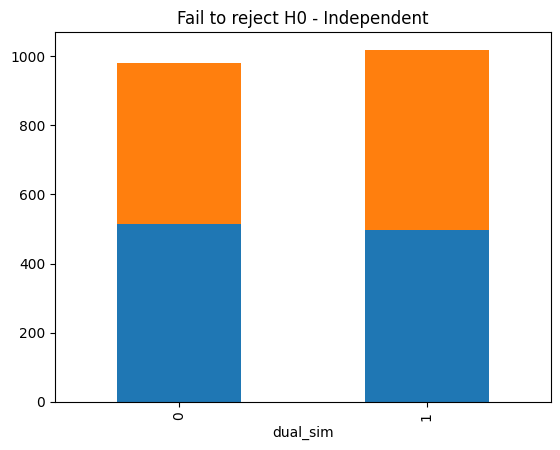


=====Analyze of four_g and blue=====


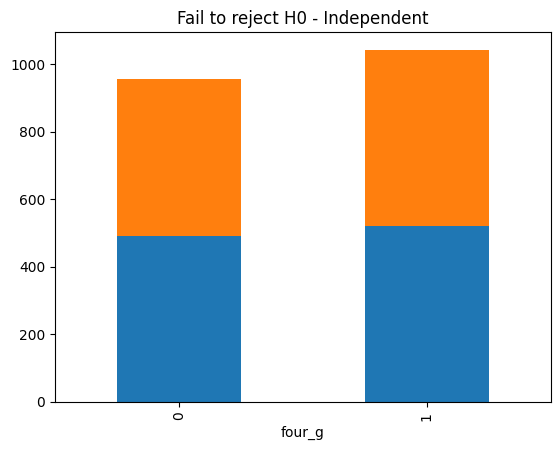


=====Analyze of blue and n_cores=====


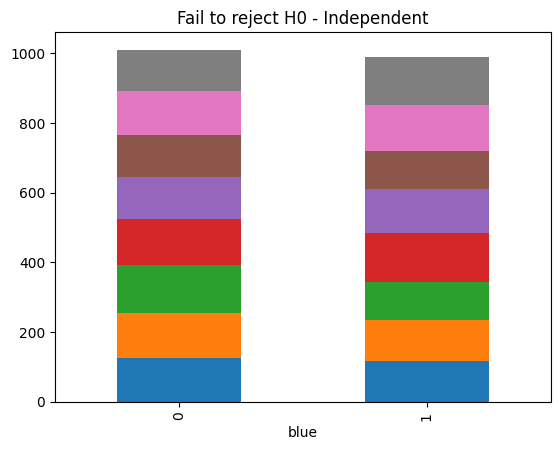


=====Analyze of blue and three_g=====


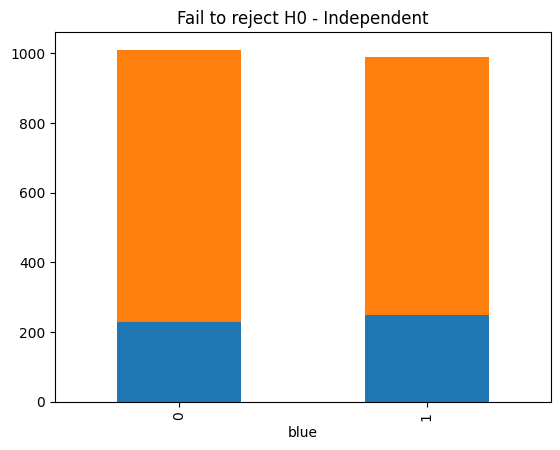


=====Analyze of blue and touch_screen=====


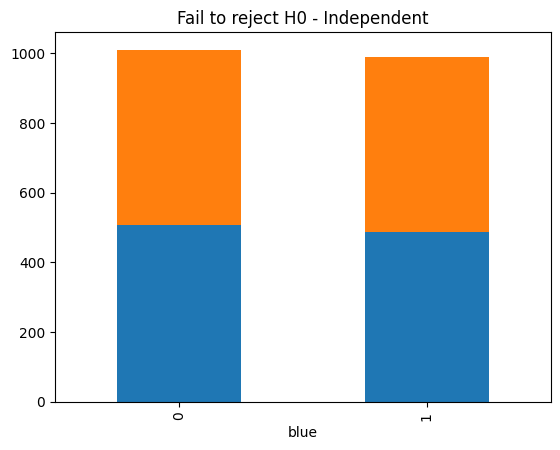


=====Analyze of blue and wifi=====


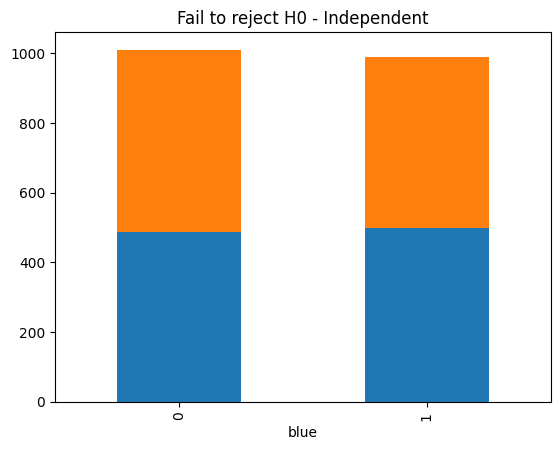


=====Analyze of dual_sim and four_g=====


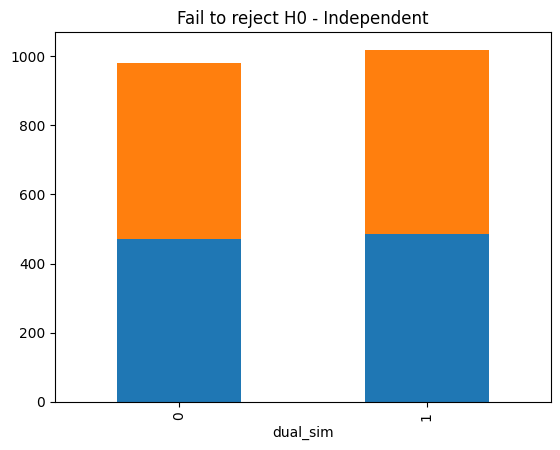


=====Analyze of dual_sim and n_cores=====


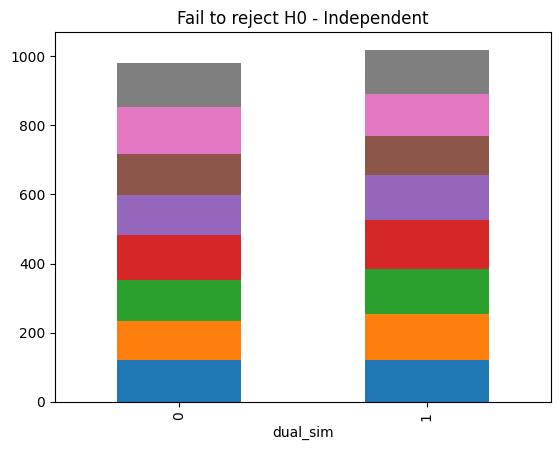


=====Analyze of dual_sim and three_g=====


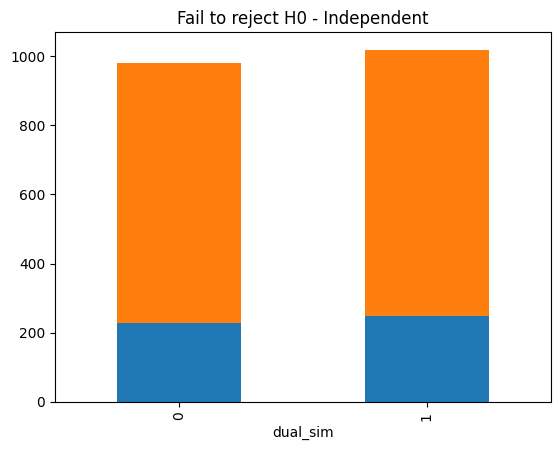


=====Analyze of dual_sim and touch_screen=====


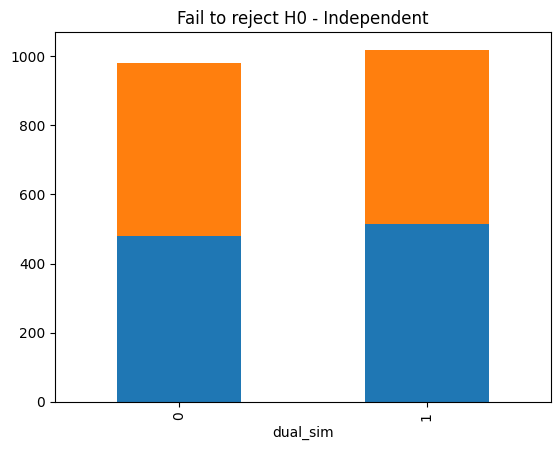


=====Analyze of dual_sim and wifi=====


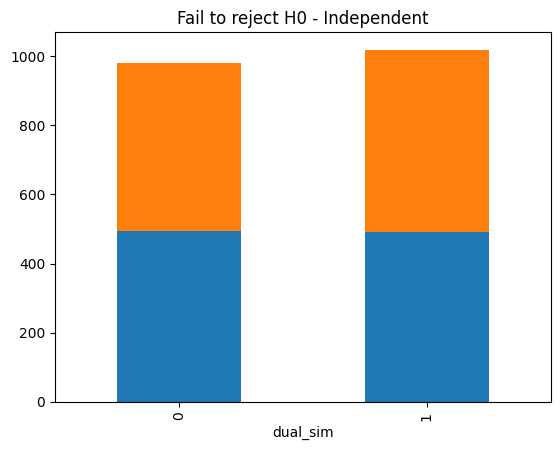


=====Analyze of four_g and n_cores=====


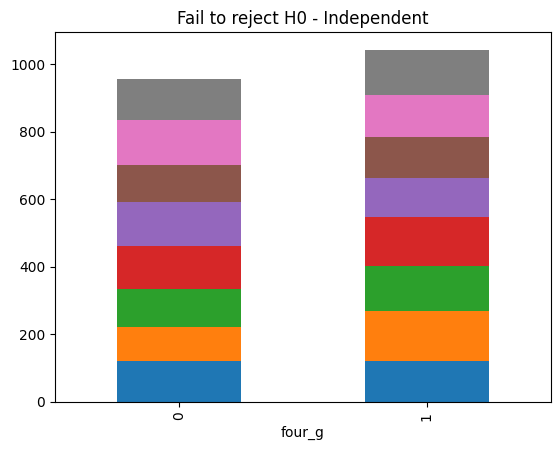


=====Analyze of four_g and three_g=====


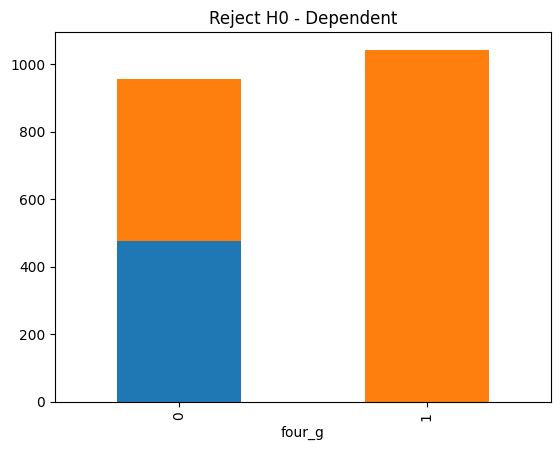


=====Analyze of four_g and touch_screen=====


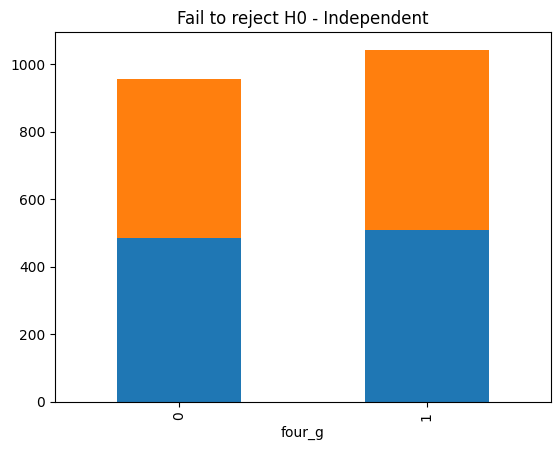


=====Analyze of four_g and wifi=====


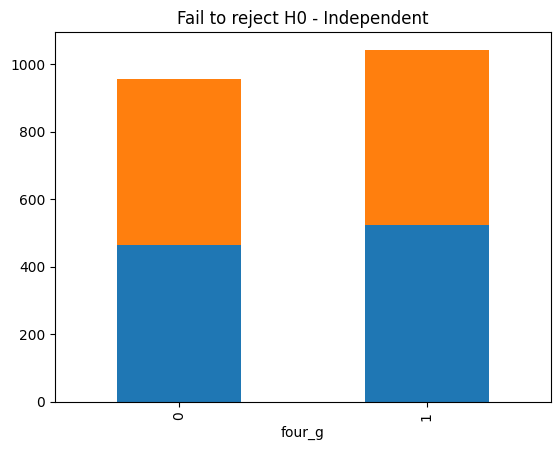


=====Analyze of three_g and n_cores=====


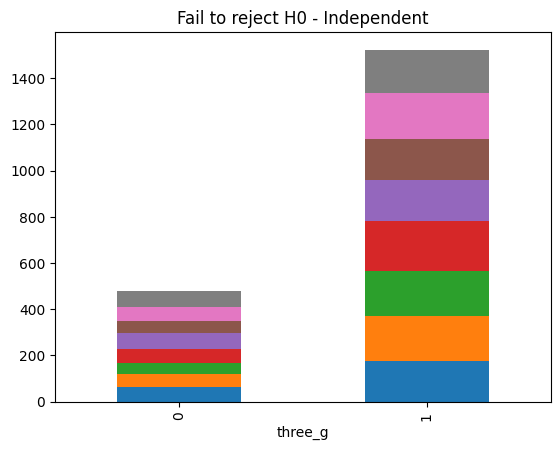


=====Analyze of touch_screen and n_cores=====


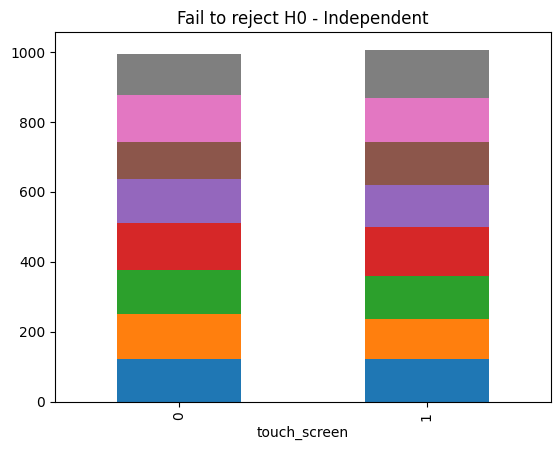


=====Analyze of wifi and n_cores=====


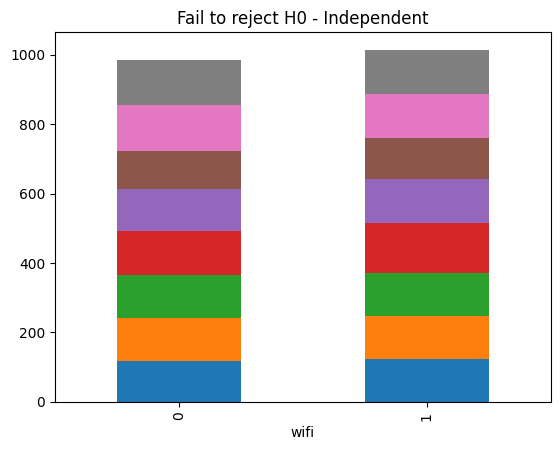


=====Analyze of touch_screen and three_g=====


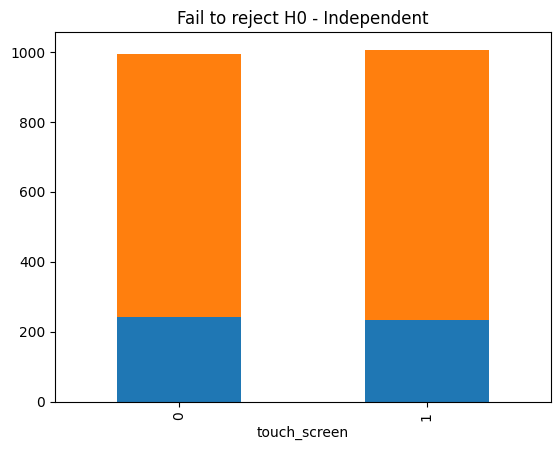


=====Analyze of wifi and three_g=====


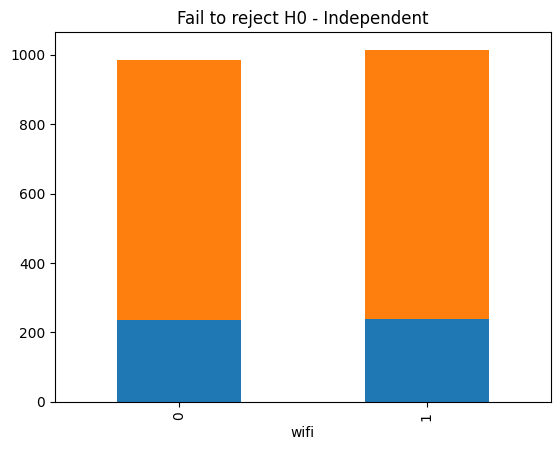


=====Analyze of touch_screen and wifi=====


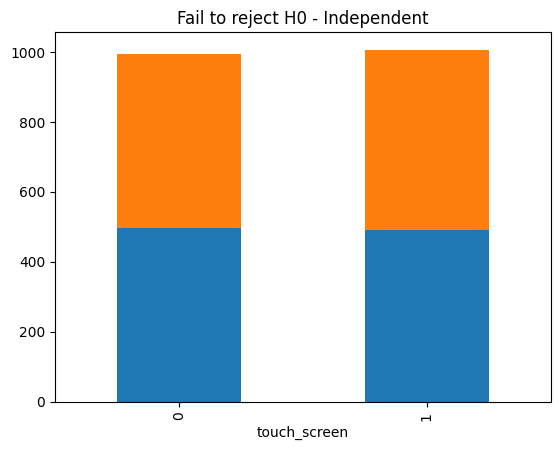

In [19]:
for i in lst:
    _analyzer.analyze_category_vs_category(i[0], i[1], df_in_catogory)
    print("\n==================================================================")

In [20]:
catogory_lst = pd.DataFrame(lst, columns=['var1','var2'])
catogory_lst

,var1,var2
0,dual_sim,blue
1,four_g,blue
2,blue,n_cores
3,blue,three_g
4,blue,touch_screen
5,blue,wifi
6,dual_sim,four_g
7,dual_sim,n_cores
8,dual_sim,three_g
9,dual_sim,touch_screen


In [21]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [22]:
def check_catogory_catogory(var_1, var_2, data_frame, prob = 0.95 ):
    tw_table = pd.crosstab(data_frame[var_1], data_frame[var_2])
    stats, p_value, dof, expected = chi2_contingency(tw_table)
    prob = 0.95
    alpha = 1 - prob
    if p_value <= alpha:
        return("Reject H0 - Dependent")
    else:
        return("Accept H0 - Independent")

In [23]:
result = []
for i in lst:
    results = check_catogory_catogory(i[0], i[1], df_in_catogory)
    result.append(results)

In [24]:
catogory_lst['result']=result
catogory_lst

,var1,var2,result
0,dual_sim,blue,Accept H0 - Independent
1,four_g,blue,Accept H0 - Independent
2,blue,n_cores,Accept H0 - Independent
3,blue,three_g,Accept H0 - Independent
4,blue,touch_screen,Accept H0 - Independent
5,blue,wifi,Accept H0 - Independent
6,dual_sim,four_g,Accept H0 - Independent
7,dual_sim,n_cores,Accept H0 - Independent
8,dual_sim,three_g,Accept H0 - Independent
9,dual_sim,touch_screen,Accept H0 - Independent


- Đa số các biến đều độc lập trừ cặp "three_g" - "four_g"

## In_catogory - In_Numeric

                sum_sq      df         F    PR(>F)
C(blue)   4.886516e+04     1.0  0.252977  0.615042
Residual  3.859348e+08  1998.0       NaN       NaN


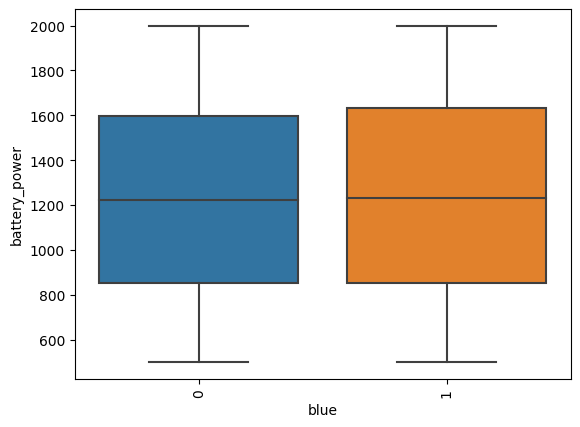


                   sum_sq      df         F    PR(>F)
C(dual_sim)  6.759186e+05     1.0  3.504953  0.061332
Residual     3.853077e+08  1998.0       NaN       NaN


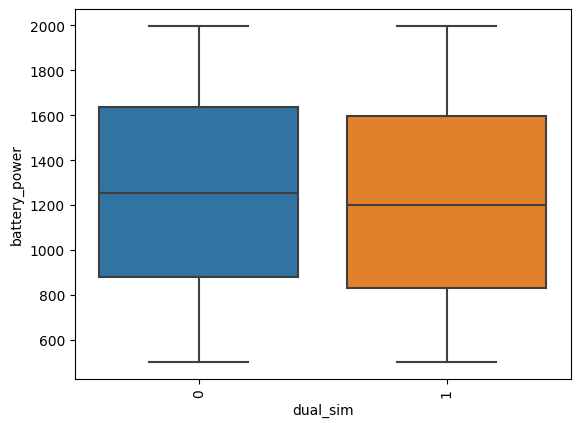


                 sum_sq      df         F    PR(>F)
C(four_g)  9.471200e+04     1.0  0.490386  0.483837
Residual   3.858889e+08  1998.0       NaN       NaN


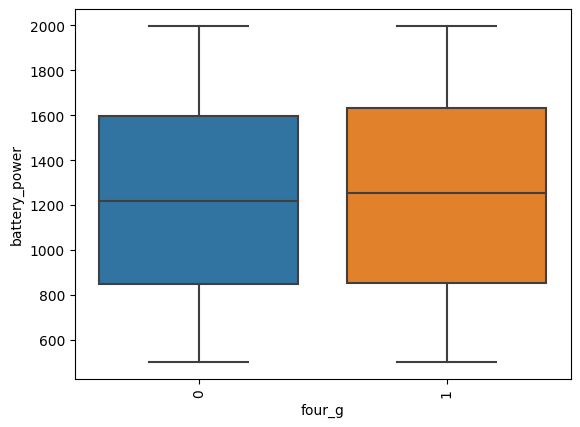


                  sum_sq      df         F    PR(>F)
C(n_cores)  1.363783e+06     7.0  1.009032  0.422704
Residual    3.846198e+08  1992.0       NaN       NaN


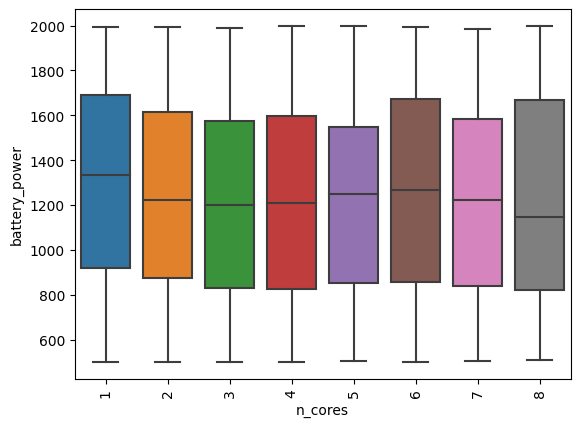


                  sum_sq      df        F    PR(>F)
C(three_g)  5.124333e+04     1.0  0.26529  0.606566
Residual    3.859324e+08  1998.0      NaN       NaN


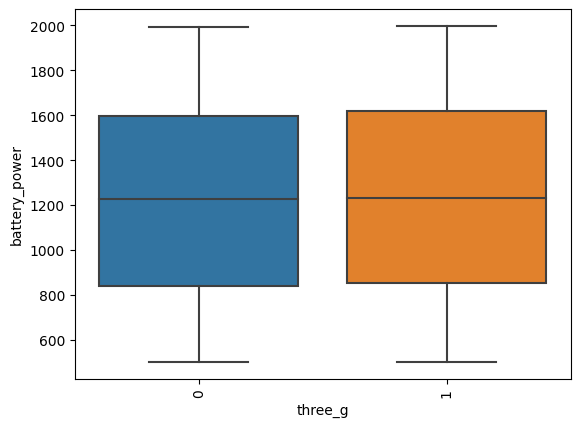


                       sum_sq      df         F    PR(>F)
C(touch_screen)  4.268315e+04     1.0  0.220969  0.638354
Residual         3.859409e+08  1998.0       NaN       NaN


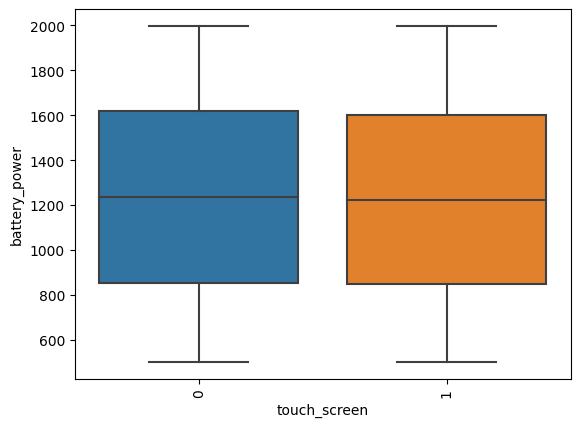


                sum_sq      df         F    PR(>F)
C(wifi)   2.686618e+04     1.0  0.139079  0.709237
Residual  3.859568e+08  1998.0       NaN       NaN


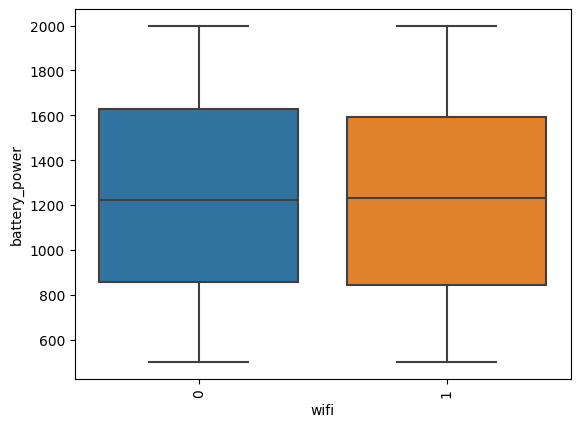


               sum_sq      df         F    PR(>F)
C(blue)      0.610638     1.0  0.917024  0.338373
Residual  1330.449237  1998.0       NaN       NaN


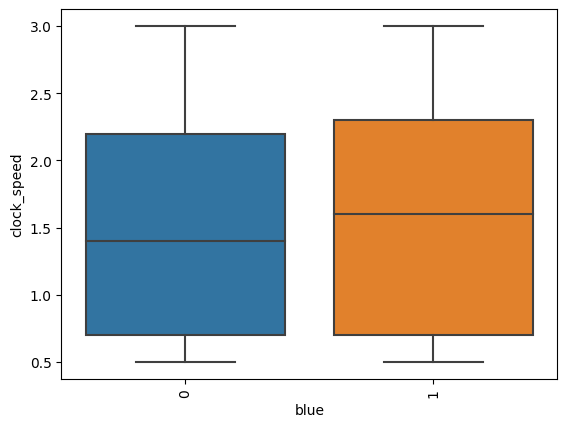


                  sum_sq      df         F    PR(>F)
C(dual_sim)     0.002302     1.0  0.003456  0.953127
Residual     1331.057573  1998.0       NaN       NaN


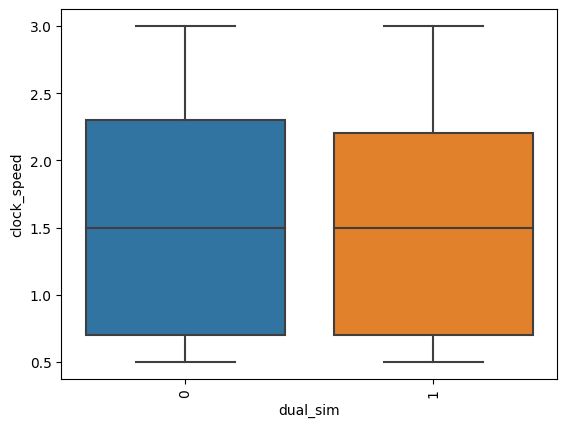


                sum_sq      df         F    PR(>F)
C(four_g)     2.469534     1.0  3.713808  0.054106
Residual   1328.590341  1998.0       NaN       NaN


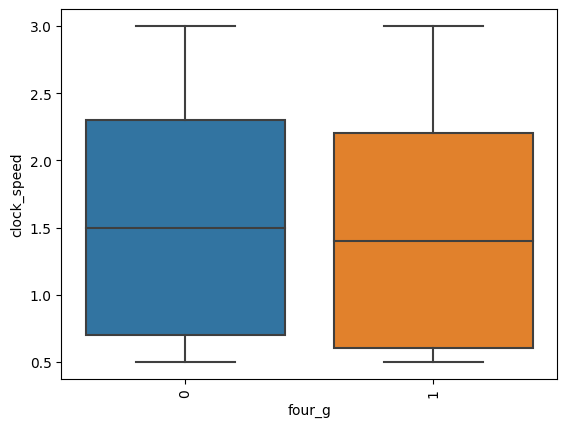


                 sum_sq      df         F    PR(>F)
C(n_cores)     5.558000     7.0  1.193245  0.303099
Residual    1325.501875  1992.0       NaN       NaN


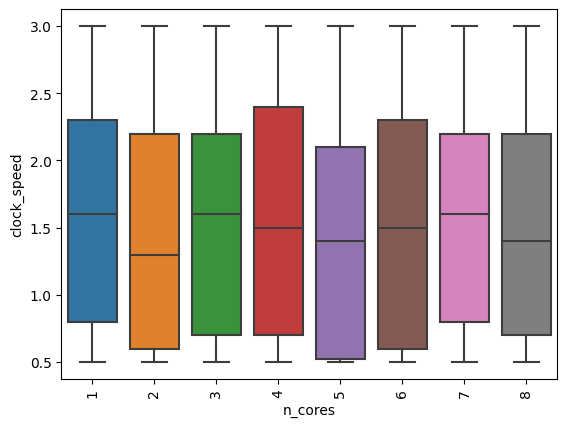


                 sum_sq      df         F    PR(>F)
C(three_g)     2.869858     1.0  4.317135  0.037858
Residual    1328.190017  1998.0       NaN       NaN


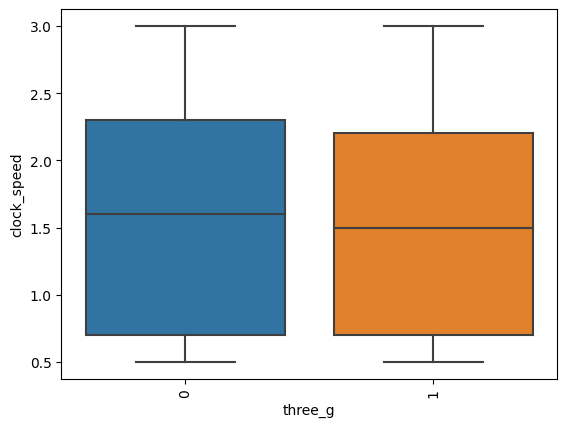


                      sum_sq      df         F    PR(>F)
C(touch_screen)     0.519502     1.0  0.780108  0.377214
Residual         1330.540373  1998.0       NaN       NaN


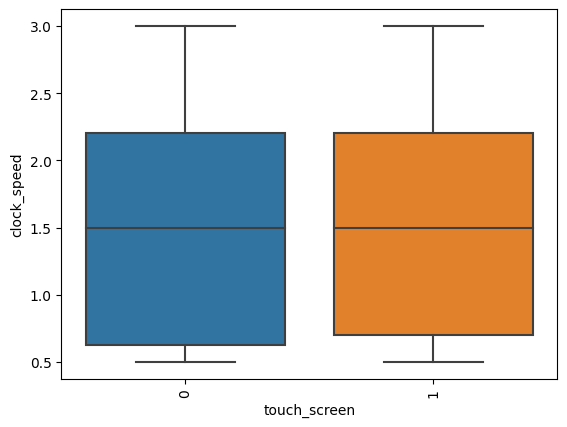


               sum_sq      df        F    PR(>F)
C(wifi)      0.797079     1.0  1.19718  0.274018
Residual  1330.262796  1998.0      NaN       NaN


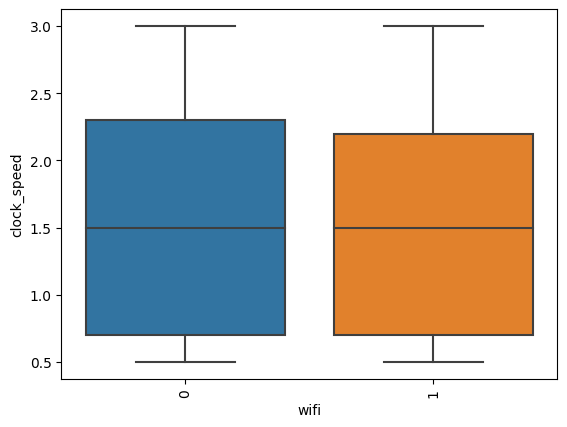


                sum_sq      df         F    PR(>F)
C(blue)       0.486457     1.0  0.025797  0.872414
Residual  37676.933043  1998.0       NaN       NaN


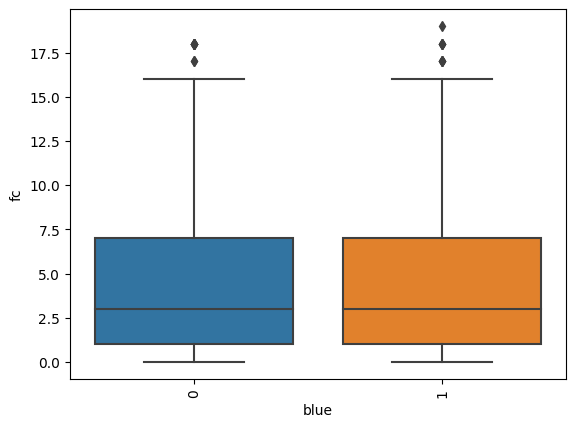


                   sum_sq      df         F   PR(>F)
C(dual_sim)     31.955598     1.0  1.696015  0.19296
Residual     37645.463902  1998.0       NaN      NaN


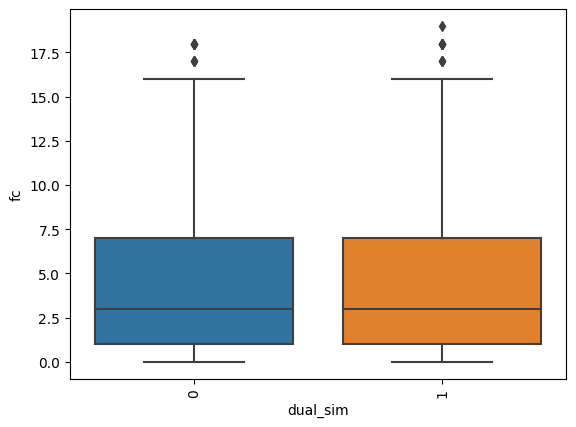


                 sum_sq      df         F    PR(>F)
C(four_g)     10.332025     1.0  0.548048  0.459203
Residual   37667.087475  1998.0       NaN       NaN


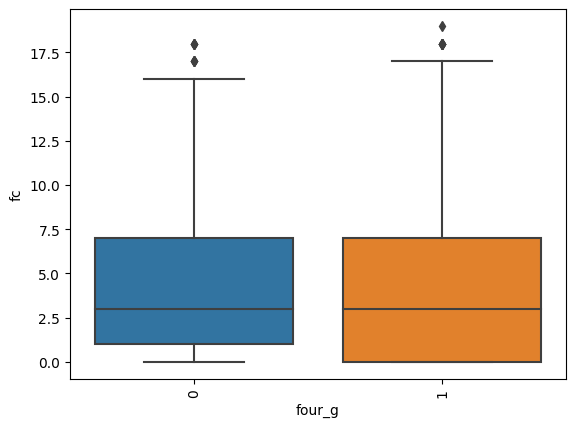


                  sum_sq      df         F    PR(>F)
C(n_cores)     41.393349     7.0  0.312981  0.948428
Residual    37636.026151  1992.0       NaN       NaN


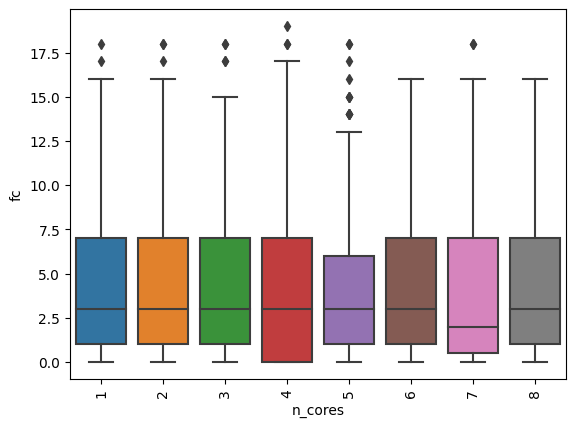


                 sum_sq      df        F    PR(>F)
C(three_g)      0.12107     1.0  0.00642  0.936145
Residual    37677.29843  1998.0      NaN       NaN


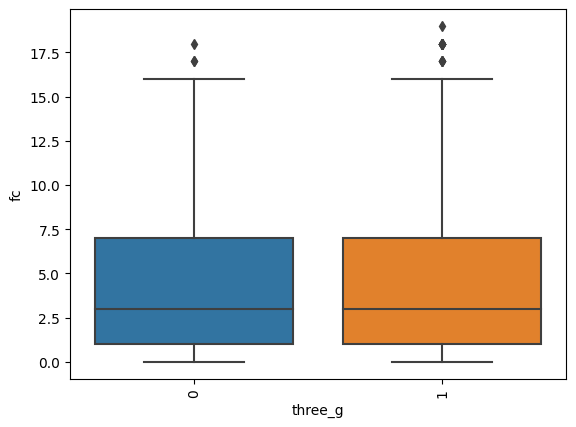


                       sum_sq      df         F    PR(>F)
C(touch_screen)      8.283945     1.0  0.439387  0.507495
Residual         37669.135555  1998.0       NaN       NaN


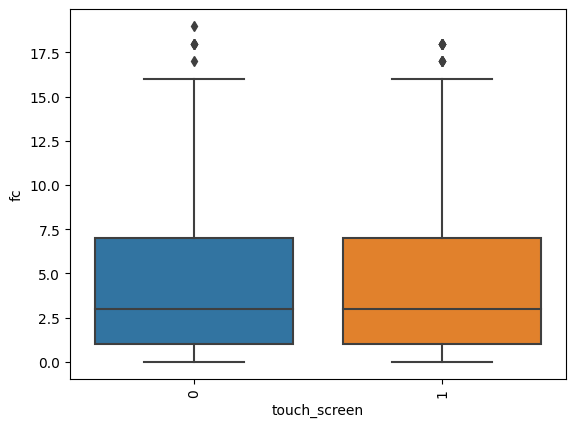


                sum_sq      df         F    PR(>F)
C(wifi)      15.199151     1.0  0.806323  0.369318
Residual  37662.220349  1998.0       NaN       NaN


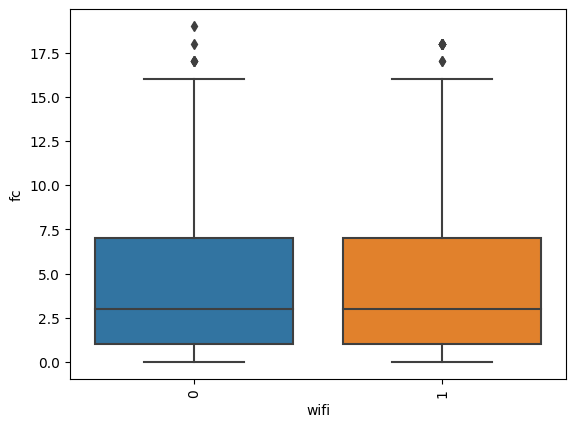


                 sum_sq      df         F    PR(>F)
C(blue)     1116.025025     1.0  3.393481  0.065603
Residual  657088.650475  1998.0       NaN       NaN


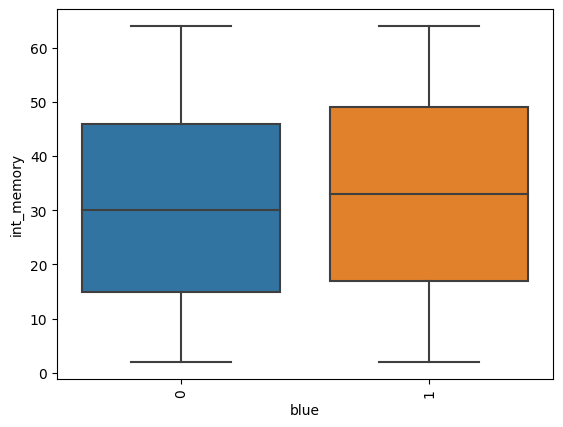


                    sum_sq      df         F    PR(>F)
C(dual_sim)     161.806362     1.0  0.491289  0.483435
Residual     658042.869138  1998.0       NaN       NaN


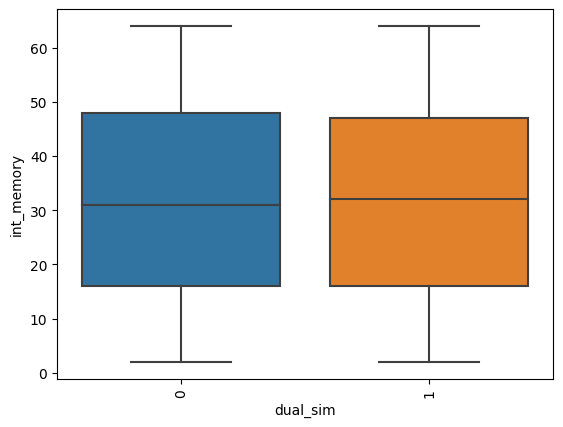


                  sum_sq      df         F    PR(>F)
C(four_g)      49.704719     1.0  0.150892  0.697726
Residual   658154.970781  1998.0       NaN       NaN


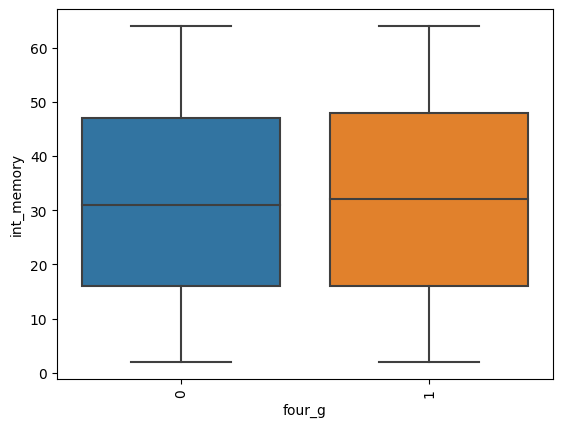


                   sum_sq      df         F    PR(>F)
C(n_cores)    3920.233198     7.0  1.705048  0.103401
Residual    654284.442302  1992.0       NaN       NaN


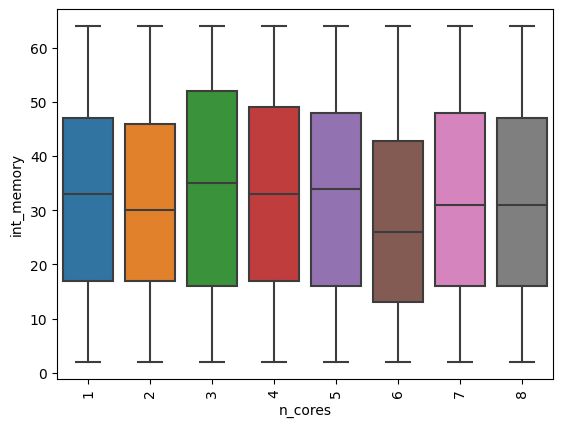


                  sum_sq      df         F    PR(>F)
C(three_g)      57.73854     1.0  0.175282  0.675504
Residual    658146.93696  1998.0       NaN       NaN


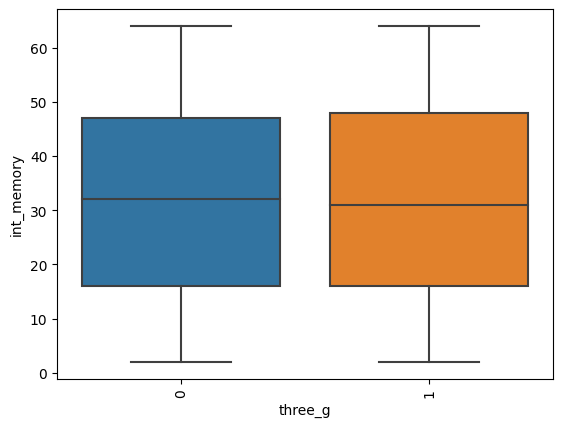


                       sum_sq      df         F    PR(>F)
C(touch_screen)     479.78421     1.0  1.457462  0.227477
Residual         657724.89129  1998.0       NaN       NaN


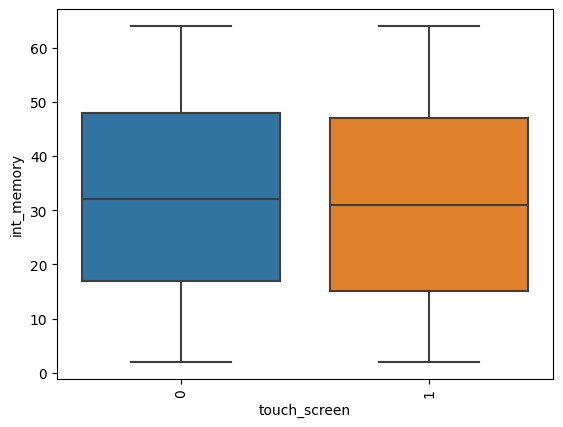


                 sum_sq      df         F    PR(>F)
C(wifi)       32.187646     1.0  0.097711  0.754626
Residual  658172.487854  1998.0       NaN       NaN


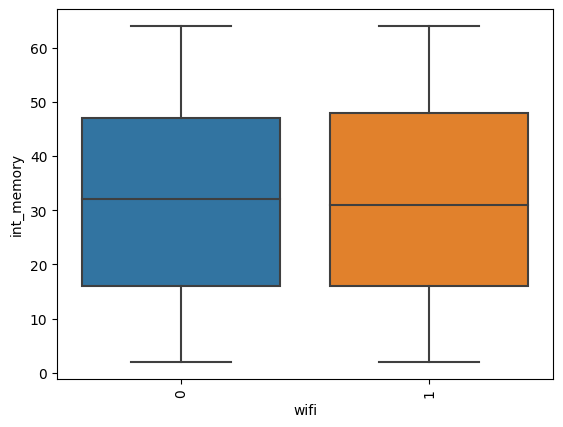


              sum_sq      df        F    PR(>F)
C(blue)     0.002726     1.0  0.03276  0.856389
Residual  166.281149  1998.0      NaN       NaN


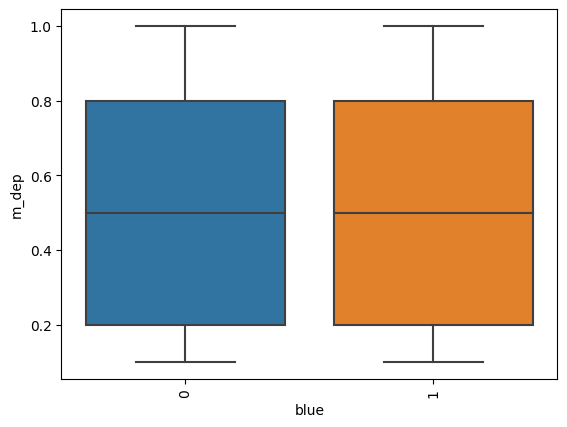


                 sum_sq      df         F    PR(>F)
C(dual_sim)    0.081521     1.0  0.980006  0.322317
Residual     166.202354  1998.0       NaN       NaN


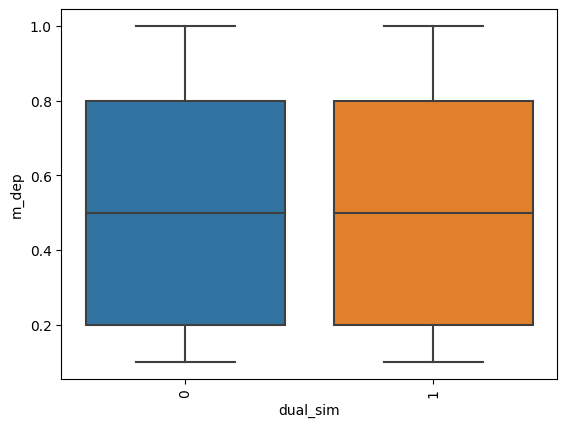


               sum_sq      df         F    PR(>F)
C(four_g)    0.000553     1.0  0.006642  0.935053
Residual   166.283322  1998.0       NaN       NaN


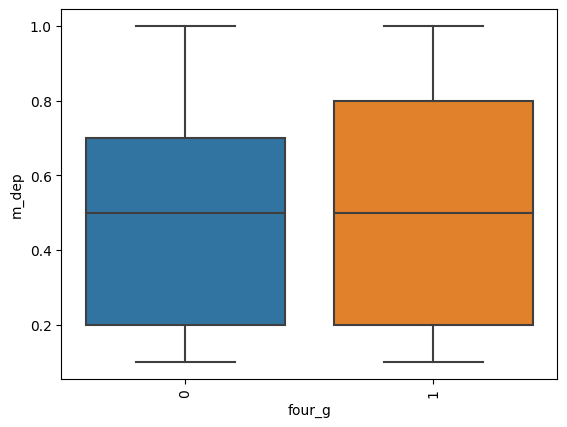


                sum_sq      df         F    PR(>F)
C(n_cores)    0.509700     7.0  0.874962  0.525462
Residual    165.774175  1992.0       NaN       NaN


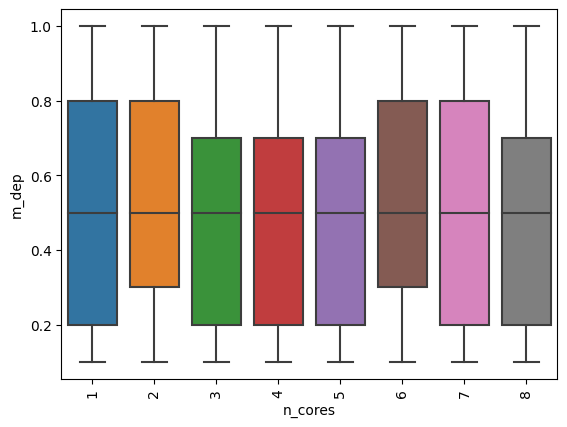


                sum_sq      df         F    PR(>F)
C(three_g)    0.024207     1.0  0.290899  0.589705
Residual    166.259668  1998.0       NaN       NaN


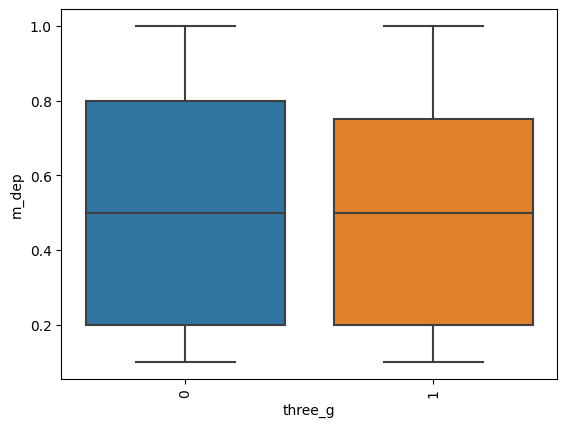


                     sum_sq      df         F    PR(>F)
C(touch_screen)    0.001157     1.0  0.013899  0.906163
Residual         166.282718  1998.0       NaN       NaN


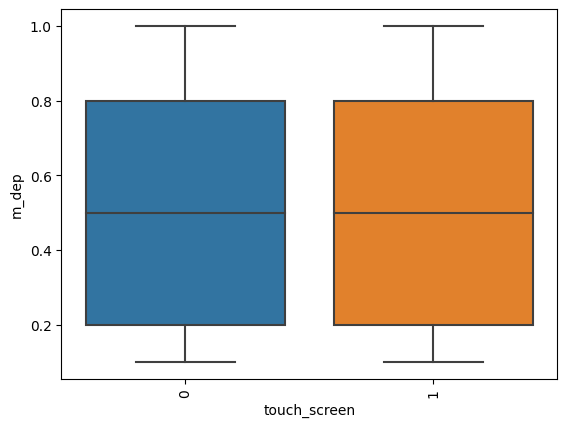


              sum_sq      df        F    PR(>F)
C(wifi)     0.133671     1.0  1.60743  0.205001
Residual  166.150204  1998.0      NaN       NaN


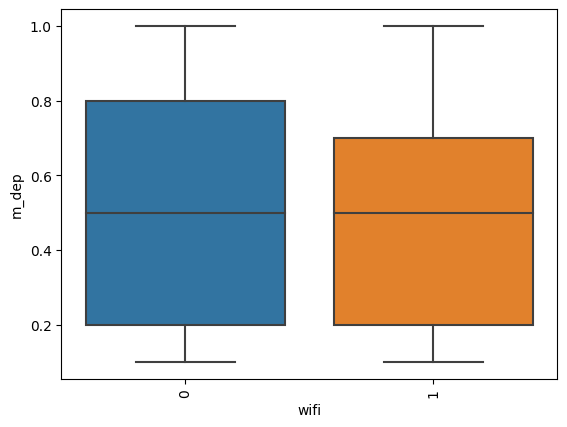


                sum_sq      df         F   PR(>F)
C(blue)   1.854712e+02     1.0  0.147943  0.70055
Residual  2.504833e+06  1998.0       NaN      NaN


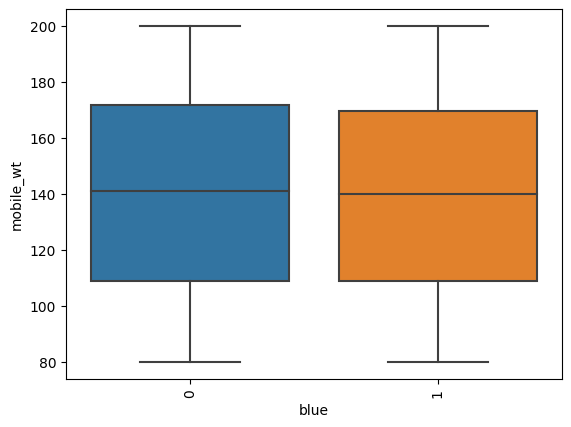


                   sum_sq      df         F    PR(>F)
C(dual_sim)  2.019789e+02     1.0  0.161111  0.688178
Residual     2.504816e+06  1998.0       NaN       NaN


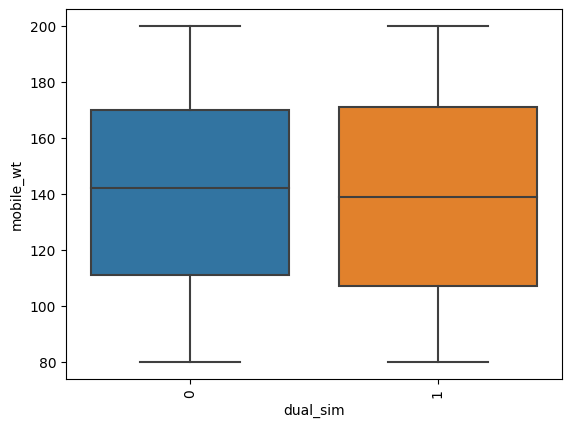


                 sum_sq      df        F    PR(>F)
C(four_g)  6.850312e+02     1.0  0.54653  0.459826
Residual   2.504333e+06  1998.0      NaN       NaN


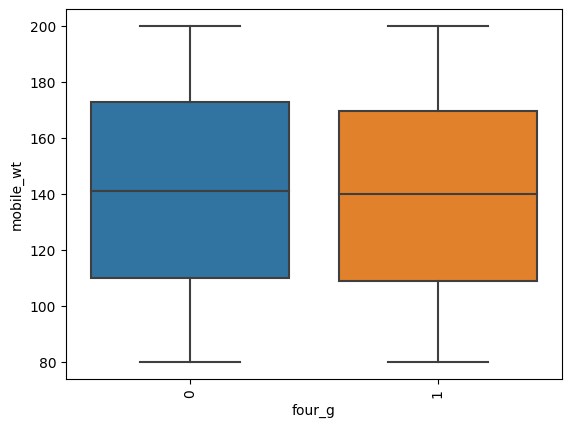


                  sum_sq      df         F    PR(>F)
C(n_cores)  1.005539e+04     7.0  1.146902  0.330638
Residual    2.494963e+06  1992.0       NaN       NaN


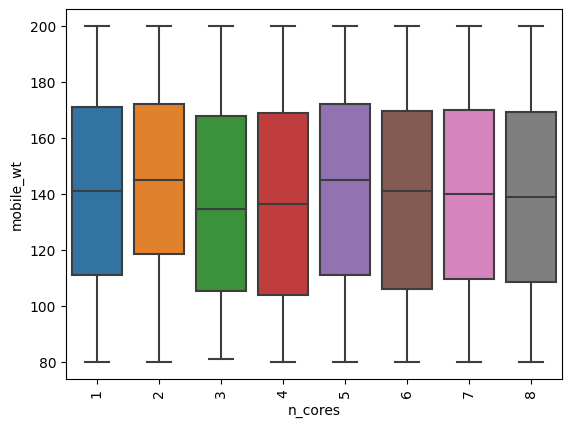


                  sum_sq      df         F   PR(>F)
C(three_g)  6.022852e+00     1.0  0.004804  0.94475
Residual    2.505012e+06  1998.0       NaN      NaN


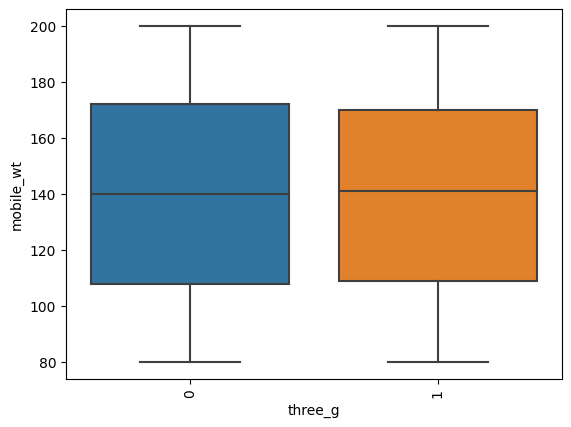


                       sum_sq      df         F    PR(>F)
C(touch_screen)  5.171509e+02     1.0  0.412564  0.520745
Residual         2.504501e+06  1998.0       NaN       NaN


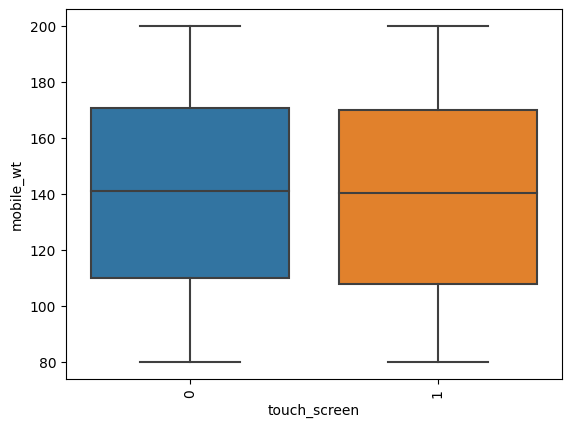


                sum_sq      df         F    PR(>F)
C(wifi)   4.197707e-01     1.0  0.000335  0.985403
Residual  2.505018e+06  1998.0       NaN       NaN


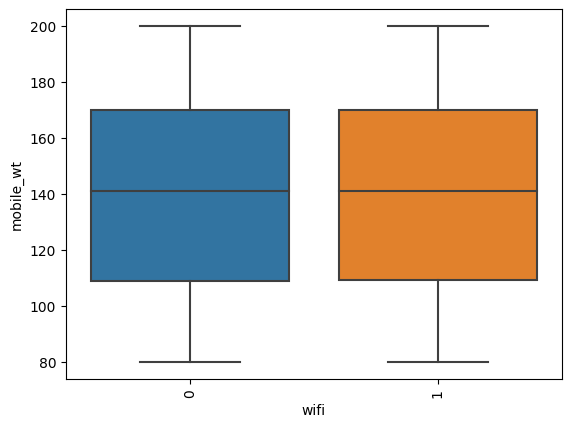


                sum_sq      df         F    PR(>F)
C(blue)       7.281353     1.0  0.197913  0.656459
Residual  73507.774147  1998.0       NaN       NaN


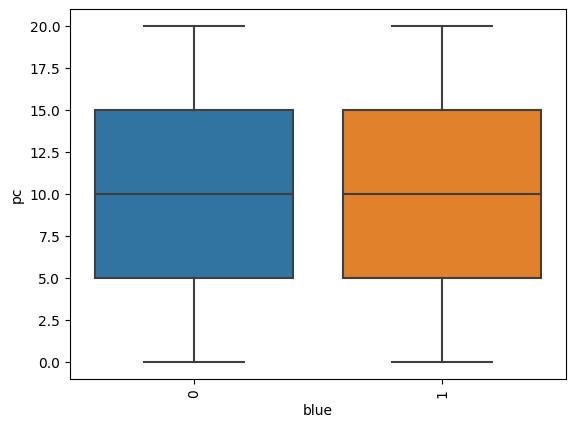


                  sum_sq      df         F    PR(>F)
C(dual_sim)     21.60383     1.0  0.587324  0.443546
Residual     73493.45167  1998.0       NaN       NaN


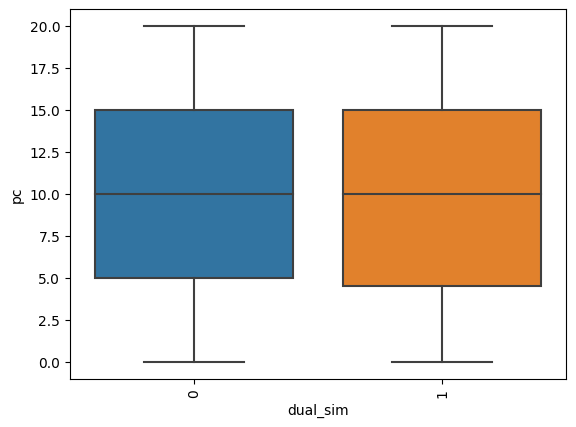


                 sum_sq      df         F    PR(>F)
C(four_g)      2.303968     1.0  0.062619  0.802428
Residual   73512.751532  1998.0       NaN       NaN


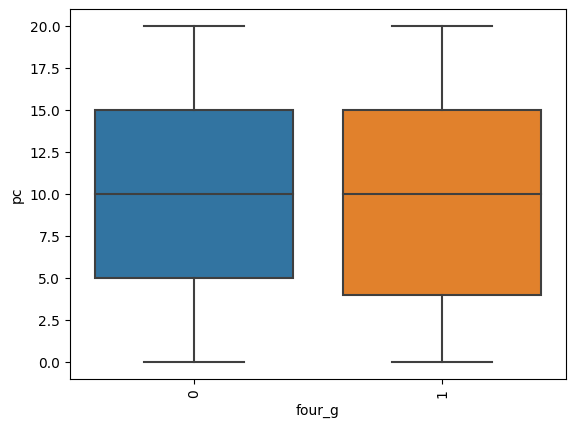


                  sum_sq      df         F    PR(>F)
C(n_cores)    206.943706     7.0  0.803325  0.584464
Residual    73308.111794  1992.0       NaN       NaN


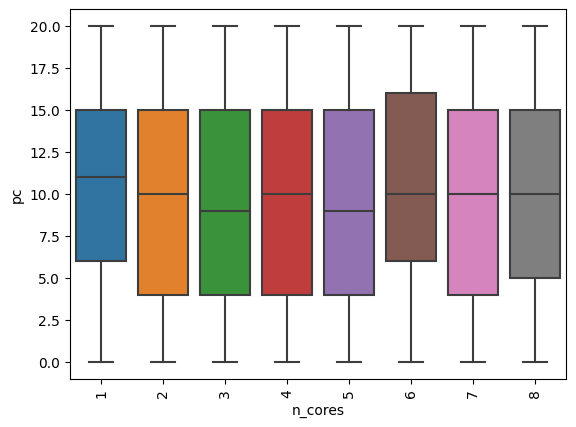


                  sum_sq      df        F    PR(>F)
C(three_g)      0.128407     1.0  0.00349  0.952898
Residual    73514.927093  1998.0      NaN       NaN


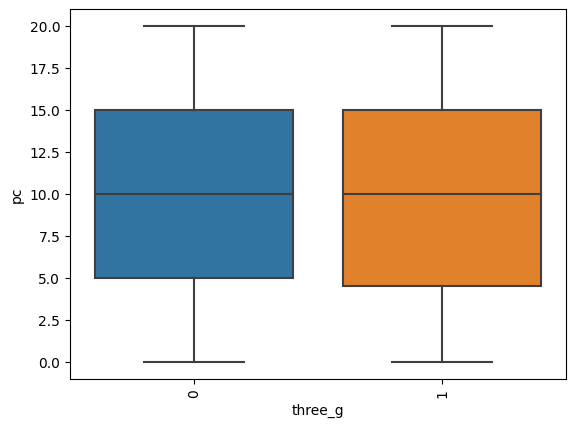


                      sum_sq      df         F    PR(>F)
C(touch_screen)      5.61799     1.0  0.152698  0.696012
Residual         73509.43751  1998.0       NaN       NaN


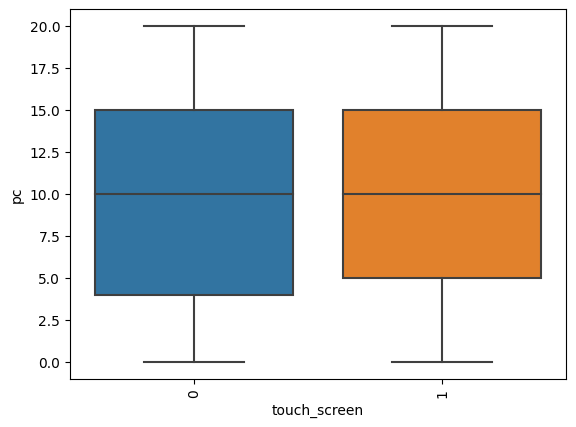


                sum_sq      df         F    PR(>F)
C(wifi)       2.134946     1.0  0.058025  0.809669
Residual  73512.920554  1998.0       NaN       NaN


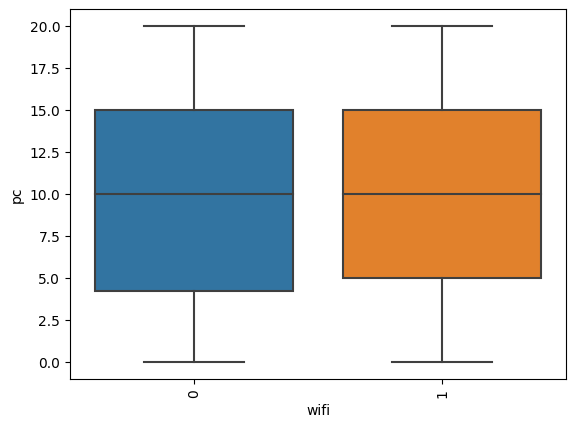


                sum_sq      df         F    PR(>F)
C(blue)   1.859369e+04     1.0  0.094369  0.758726
Residual  3.936673e+08  1998.0       NaN       NaN


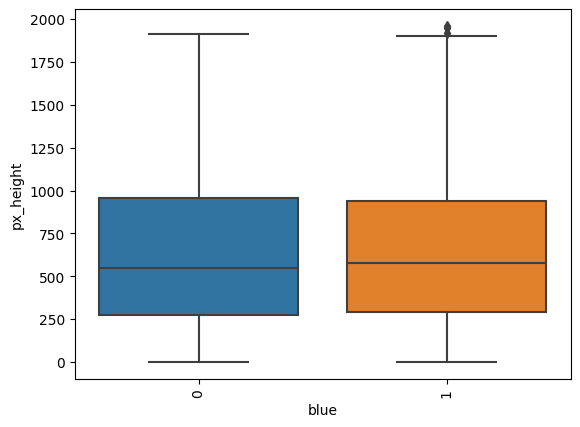


                   sum_sq      df         F    PR(>F)
C(dual_sim)  1.715591e+05     1.0  0.871061  0.350774
Residual     3.935143e+08  1998.0       NaN       NaN


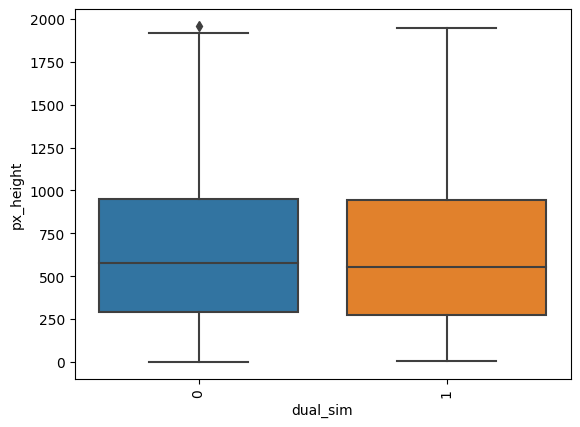


                 sum_sq      df         F    PR(>F)
C(four_g)  1.456767e+05     1.0  0.739599  0.389892
Residual   3.935402e+08  1998.0       NaN       NaN


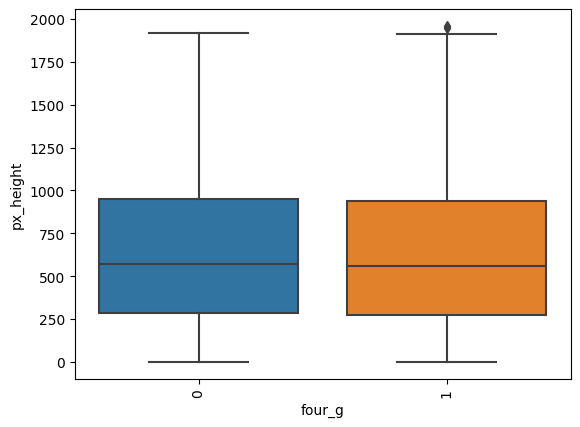


                  sum_sq      df         F    PR(>F)
C(n_cores)  3.549172e+05     7.0  0.256779  0.970128
Residual    3.933310e+08  1992.0       NaN       NaN


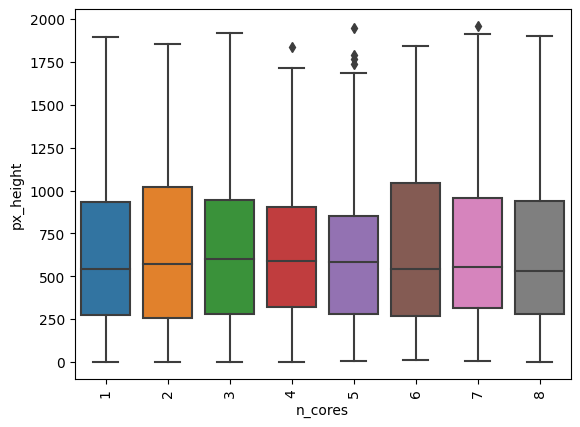


                  sum_sq      df         F    PR(>F)
C(three_g)  3.825847e+05     1.0  1.943549  0.163439
Residual    3.933033e+08  1998.0       NaN       NaN


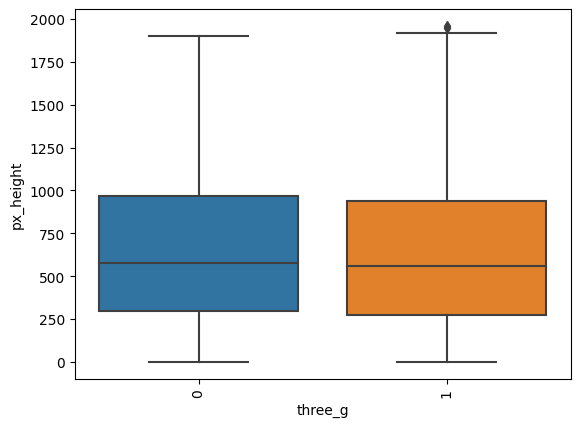


                       sum_sq      df         F    PR(>F)
C(touch_screen)  1.886664e+05     1.0  0.957962  0.327819
Residual         3.934972e+08  1998.0       NaN       NaN


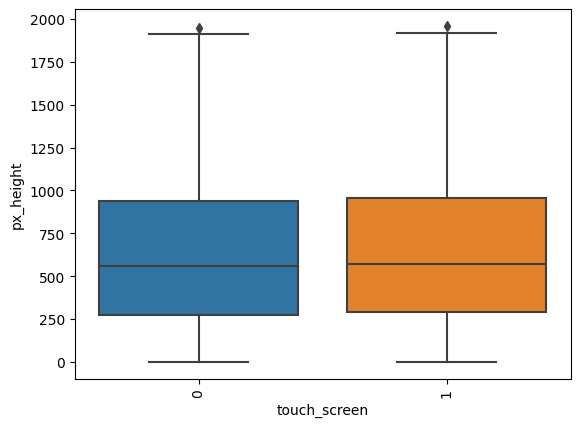


                sum_sq      df         F    PR(>F)
C(wifi)   1.057332e+06     1.0  5.380531  0.020463
Residual  3.926285e+08  1998.0       NaN       NaN


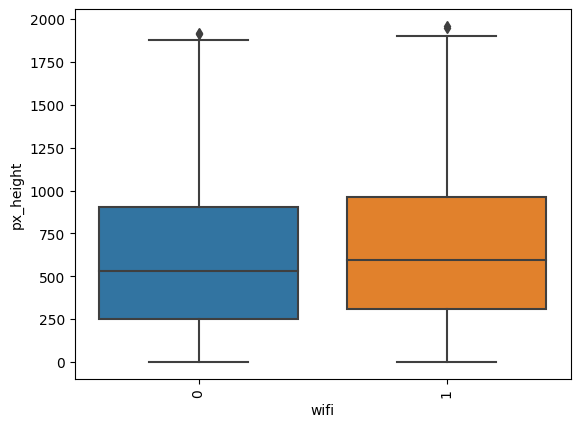


                sum_sq      df         F    PR(>F)
C(blue)   6.441352e+05     1.0  3.452559  0.063301
Residual  3.727618e+08  1998.0       NaN       NaN


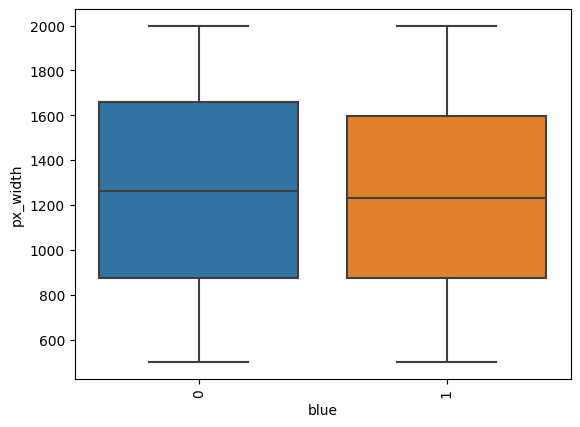


                   sum_sq      df         F    PR(>F)
C(dual_sim)  7.625681e+04     1.0  0.408114  0.523001
Residual     3.733297e+08  1998.0       NaN       NaN


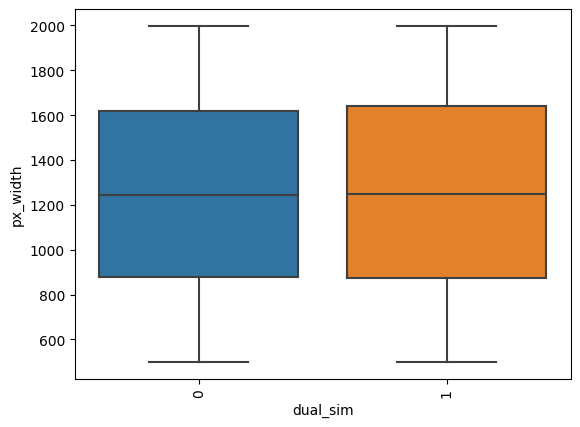


                 sum_sq      df         F    PR(>F)
C(four_g)  2.071504e+04     1.0  0.110847  0.739217
Residual   3.733852e+08  1998.0       NaN       NaN


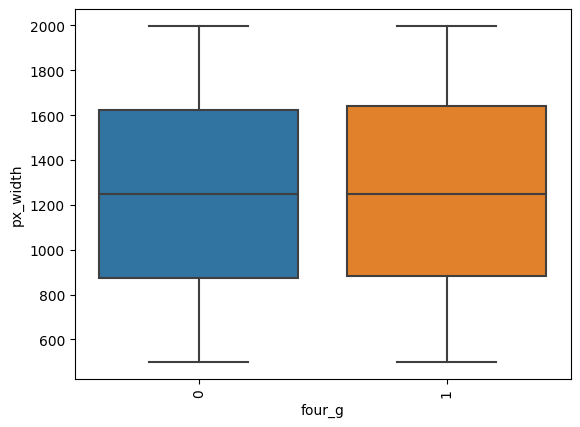


                  sum_sq      df         F   PR(>F)
C(n_cores)  1.174408e+06     7.0  0.897837  0.50714
Residual    3.722315e+08  1992.0       NaN      NaN


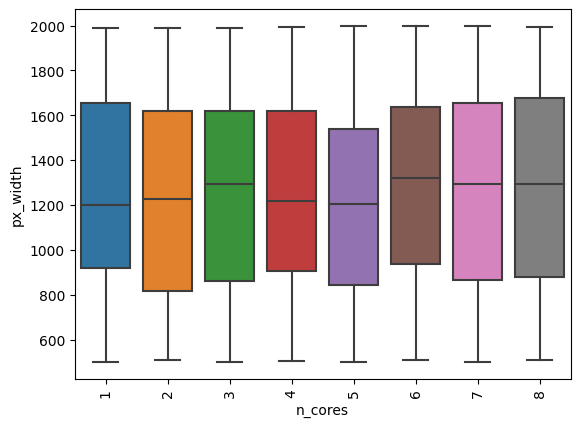


                  sum_sq      df         F   PR(>F)
C(three_g)  4.573764e+01     1.0  0.000245  0.98752
Residual    3.734059e+08  1998.0       NaN      NaN


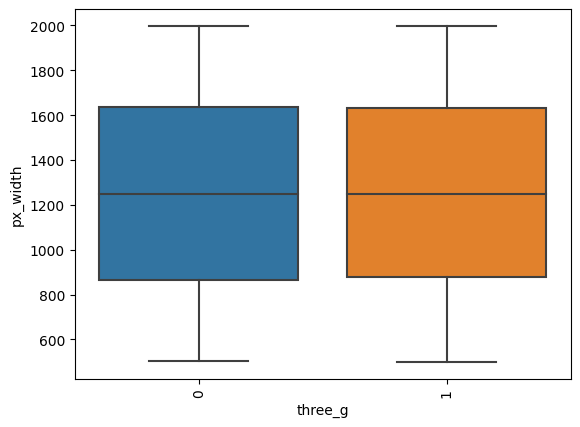


                       sum_sq      df         F    PR(>F)
C(touch_screen)  9.901219e+02     1.0  0.005298  0.941983
Residual         3.734049e+08  1998.0       NaN       NaN


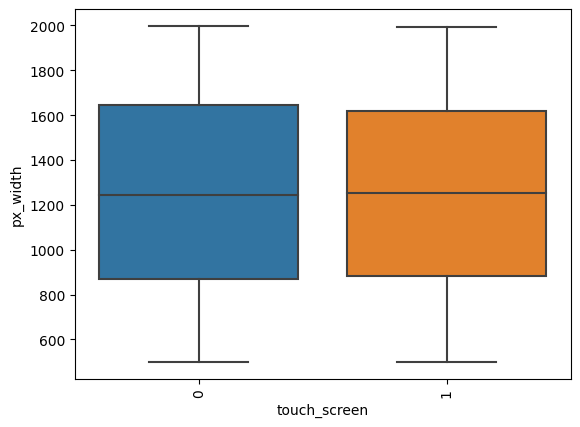


                sum_sq      df         F  PR(>F)
C(wifi)   3.432497e+05     1.0  1.838332  0.1753
Residual  3.730627e+08  1998.0       NaN     NaN


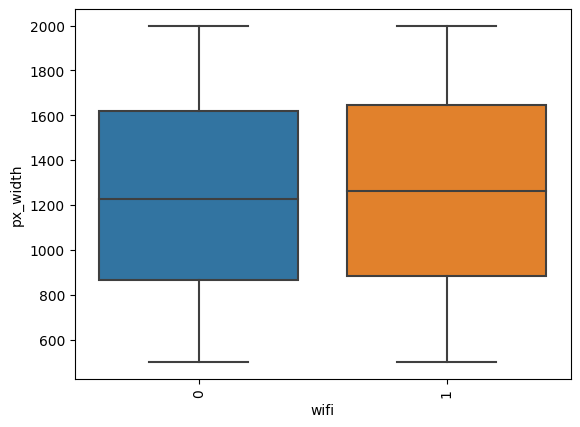


                sum_sq      df         F    PR(>F)
C(blue)   1.633239e+06     1.0  1.388319  0.238829
Residual  2.350477e+09  1998.0       NaN       NaN


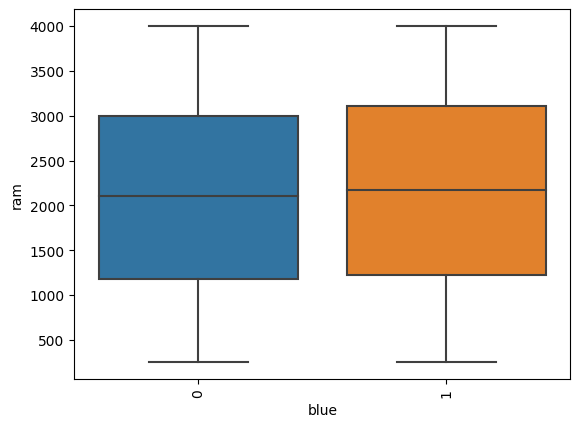


                   sum_sq      df         F    PR(>F)
C(dual_sim)  3.967800e+06     1.0  3.376143  0.066295
Residual     2.348143e+09  1998.0       NaN       NaN


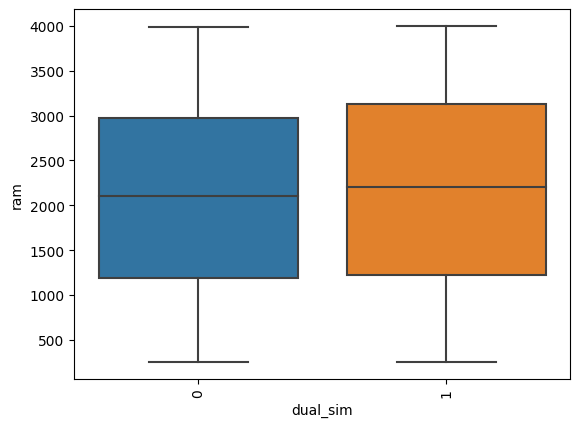


                 sum_sq      df         F    PR(>F)
C(four_g)  1.258071e+05     1.0  0.106873  0.743767
Residual   2.351985e+09  1998.0       NaN       NaN


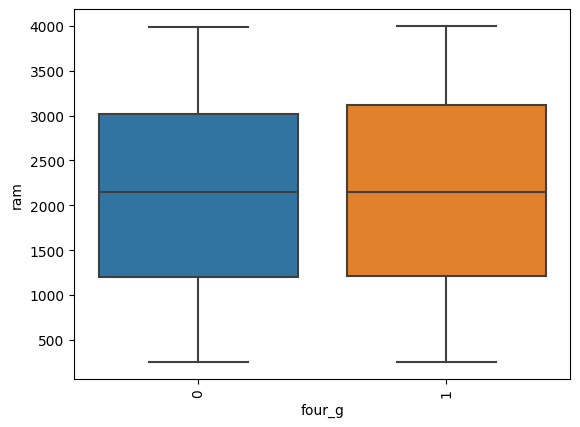


                  sum_sq      df         F    PR(>F)
C(n_cores)  3.476725e+06     7.0  0.421256  0.889561
Residual    2.348634e+09  1992.0       NaN       NaN


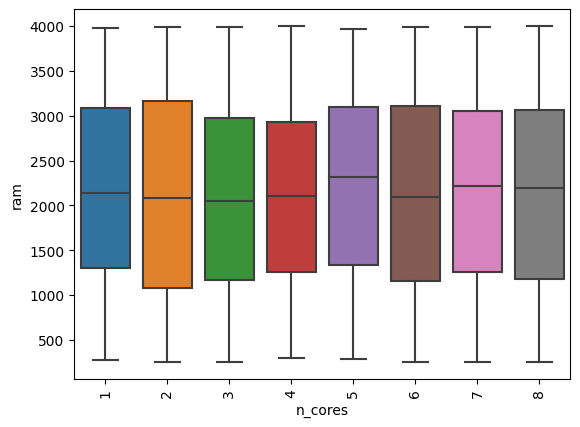


                  sum_sq      df         F    PR(>F)
C(three_g)  5.868048e+05     1.0  0.498586  0.480205
Residual    2.351524e+09  1998.0       NaN       NaN


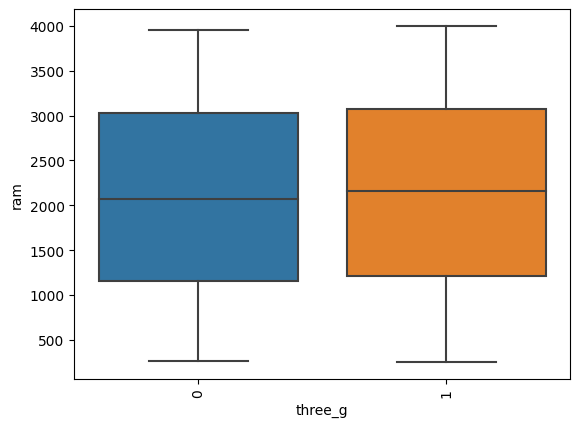


                       sum_sq      df         F    PR(>F)
C(touch_screen)  2.181549e+06     1.0  1.854837  0.173375
Residual         2.349929e+09  1998.0       NaN       NaN


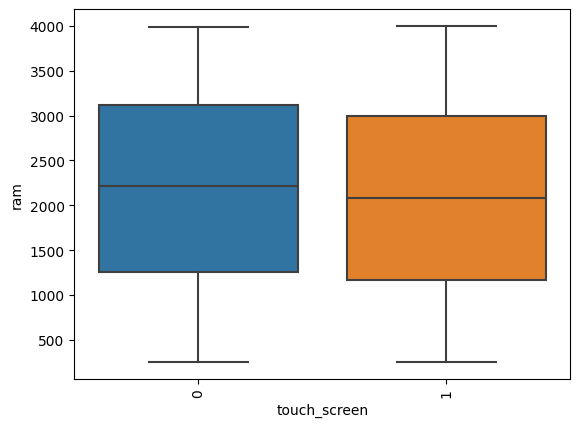


                sum_sq      df         F    PR(>F)
C(wifi)   1.208690e+06     1.0  1.027249  0.310928
Residual  2.350902e+09  1998.0       NaN       NaN


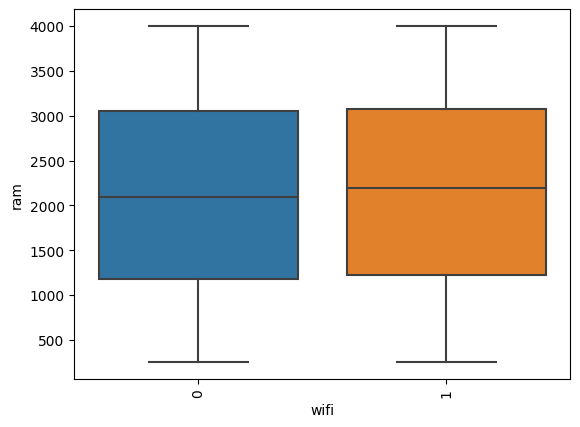


                sum_sq      df         F    PR(>F)
C(blue)       0.309289     1.0  0.017415  0.895025
Residual  35484.806211  1998.0       NaN       NaN


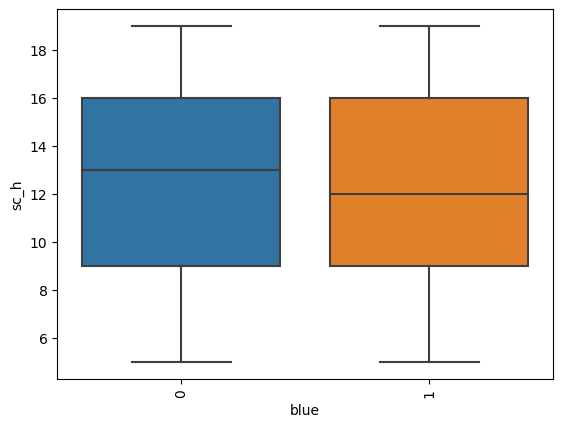


                   sum_sq      df         F    PR(>F)
C(dual_sim)      5.066738     1.0  0.285325  0.593292
Residual     35480.048762  1998.0       NaN       NaN


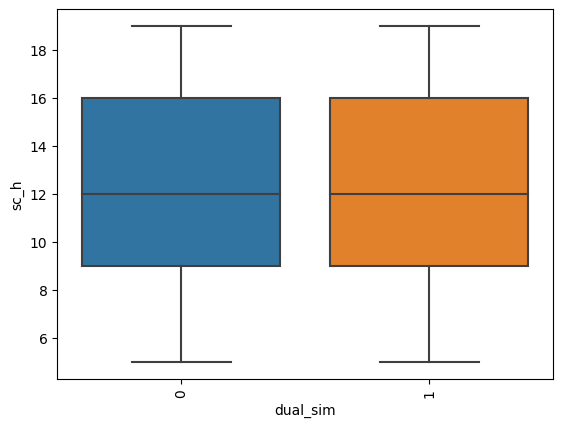


                 sum_sq      df         F    PR(>F)
C(four_g)     26.186773     1.0  1.475543  0.224617
Residual   35458.928727  1998.0       NaN       NaN


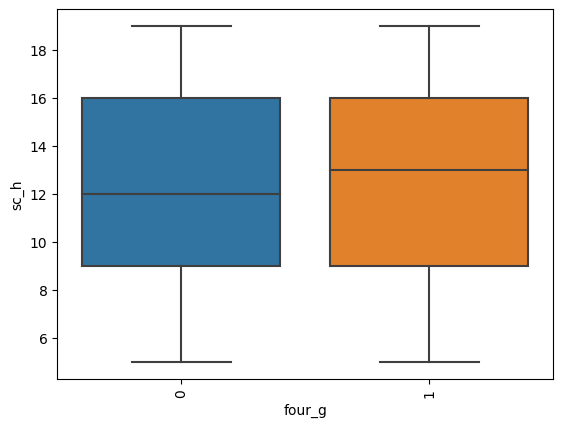


                  sum_sq      df         F   PR(>F)
C(n_cores)    134.326199     7.0  1.081317  0.37257
Residual    35350.789301  1992.0       NaN      NaN


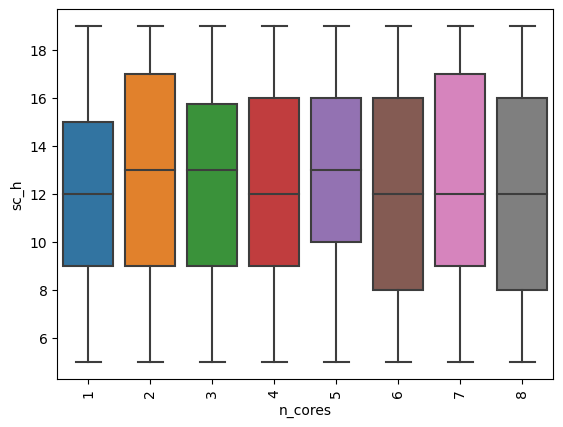


                  sum_sq      df         F    PR(>F)
C(three_g)      5.137943     1.0  0.289335  0.590707
Residual    35479.977557  1998.0       NaN       NaN


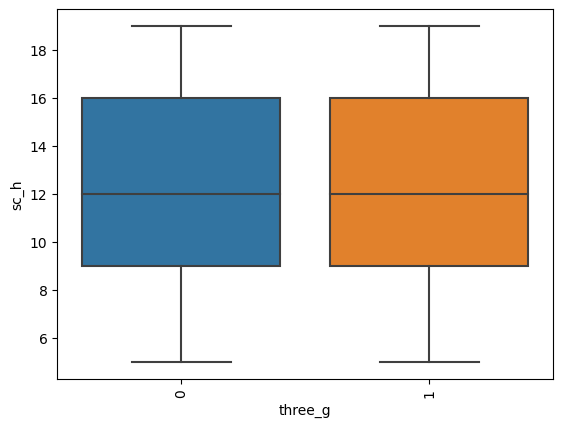


                       sum_sq      df         F    PR(>F)
C(touch_screen)     14.226646     1.0  0.801357  0.370796
Residual         35470.888854  1998.0       NaN       NaN


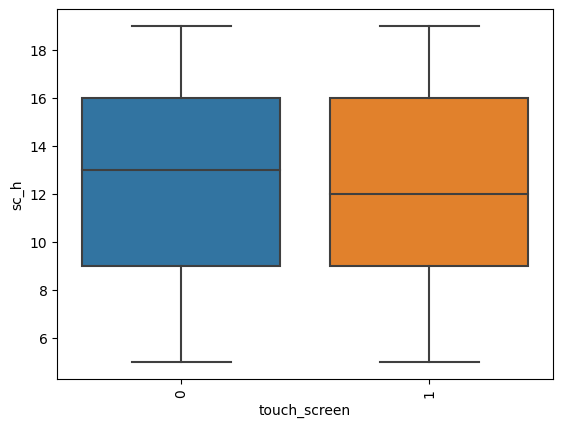


                sum_sq      df         F    PR(>F)
C(wifi)      23.857888     1.0  1.344229  0.246428
Residual  35461.257612  1998.0       NaN       NaN


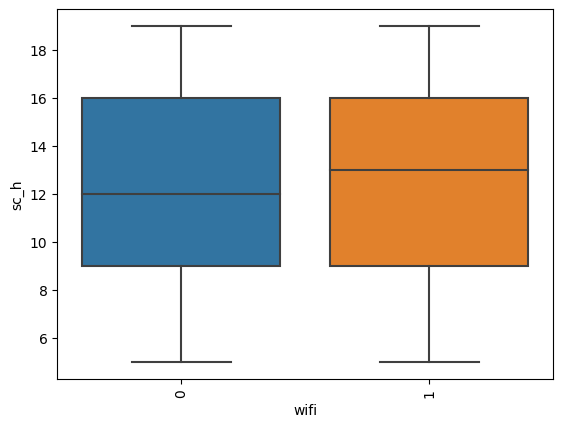


                sum_sq      df         F   PR(>F)
C(blue)       0.014259     1.0  0.000751  0.97814
Residual  37937.407741  1998.0       NaN      NaN


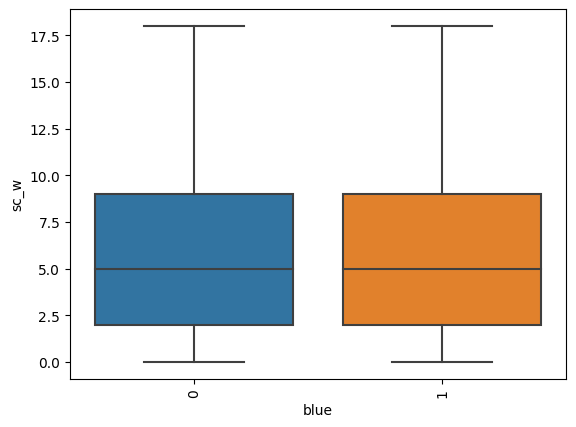


                   sum_sq      df         F    PR(>F)
C(dual_sim)     10.537485     1.0  0.555118  0.456322
Residual     37926.884515  1998.0       NaN       NaN


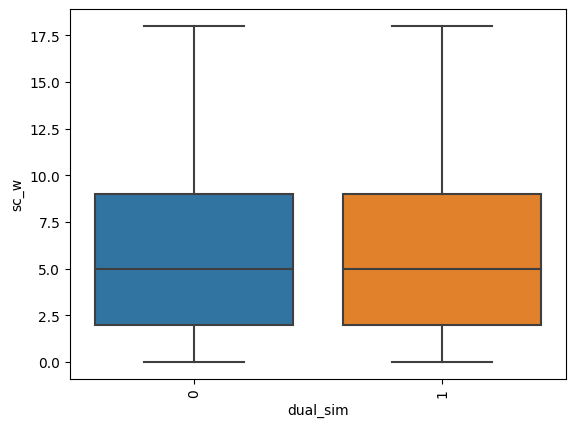


                 sum_sq      df         F    PR(>F)
C(four_g)     51.950293     1.0  2.739749  0.098037
Residual   37885.471707  1998.0       NaN       NaN


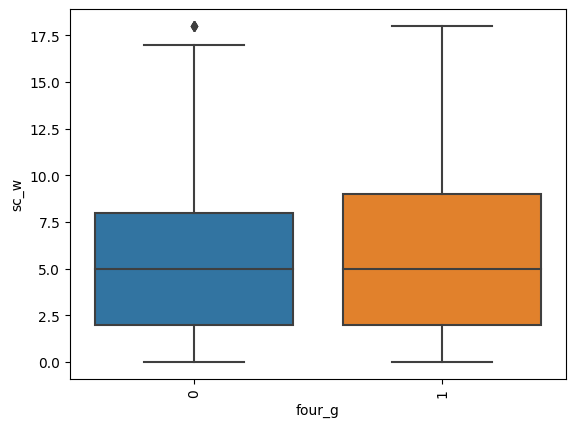


                  sum_sq      df         F    PR(>F)
C(n_cores)    241.072635     7.0  1.819868  0.079379
Residual    37696.349365  1992.0       NaN       NaN


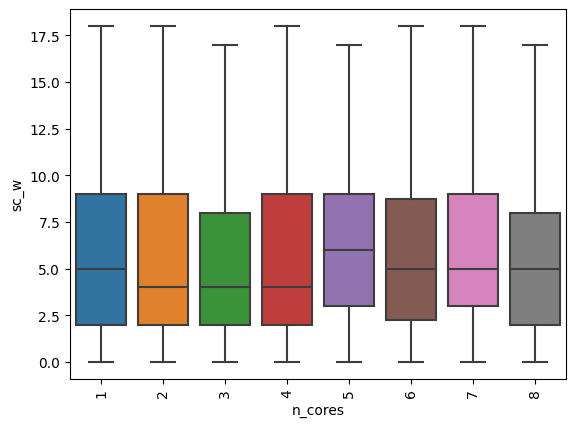


                 sum_sq      df         F    PR(>F)
C(three_g)     36.31966     1.0  1.914632  0.166604
Residual    37901.10234  1998.0       NaN       NaN


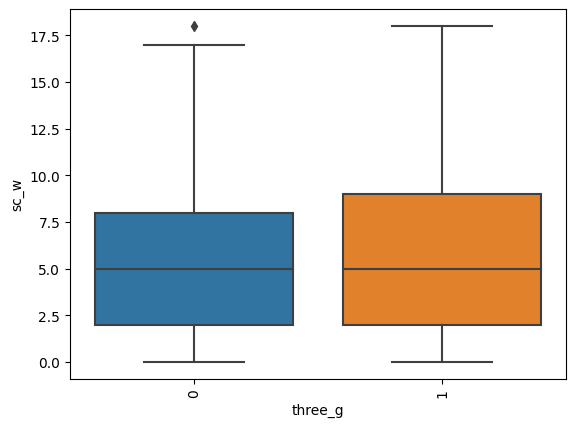


                       sum_sq      df         F    PR(>F)
C(touch_screen)      6.138098     1.0  0.323319  0.569684
Residual         37931.283902  1998.0       NaN       NaN


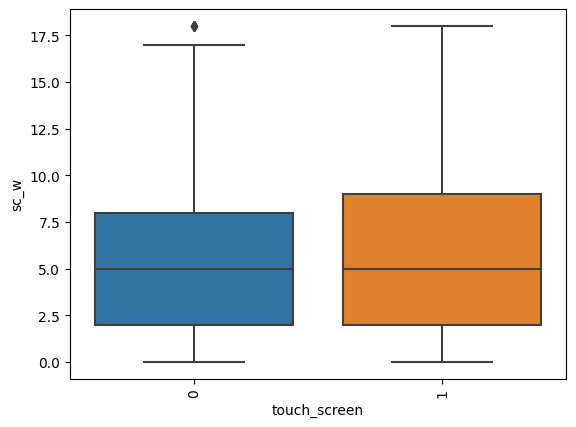


                sum_sq      df         F    PR(>F)
C(wifi)      47.602859     1.0  2.510187  0.113271
Residual  37889.819141  1998.0       NaN       NaN


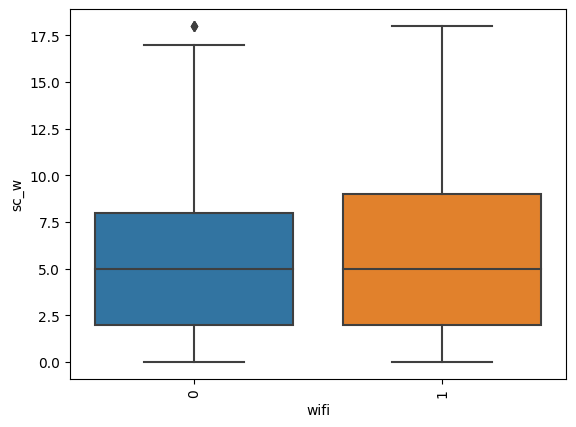


                sum_sq      df        F    PR(>F)
C(blue)      11.586623     1.0  0.38798  0.533434
Residual  59668.171377  1998.0      NaN       NaN


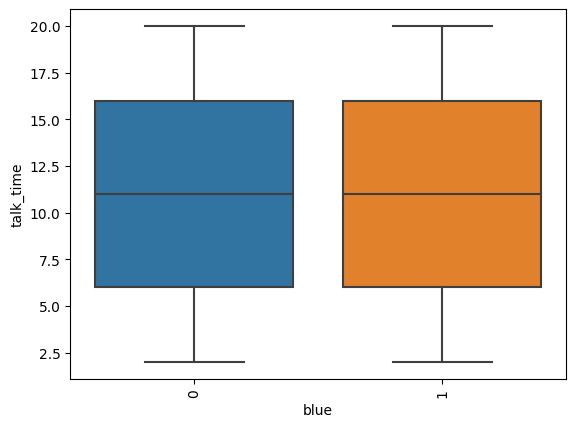


                   sum_sq      df         F    PR(>F)
C(dual_sim)     92.663279     1.0  3.107069  0.078106
Residual     59587.094721  1998.0       NaN       NaN


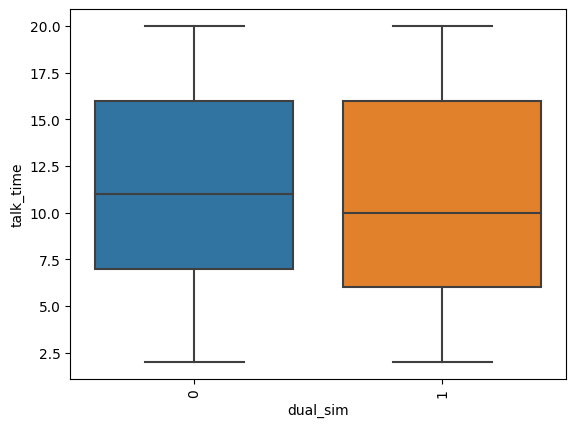


                 sum_sq      df         F    PR(>F)
C(four_g)    129.752929     1.0  4.353423  0.037061
Residual   59550.005071  1998.0       NaN       NaN


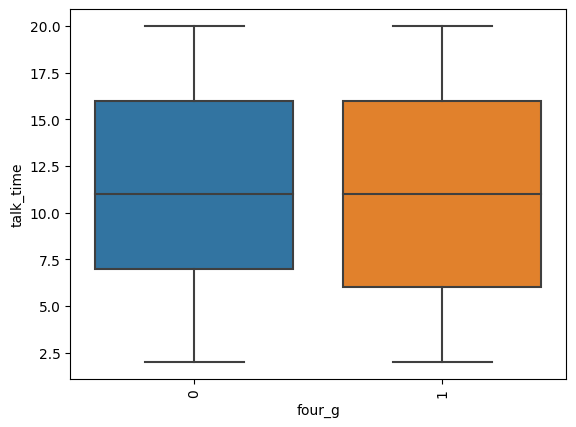


                  sum_sq      df         F    PR(>F)
C(n_cores)    108.411111     7.0  0.517878  0.821662
Residual    59571.346889  1992.0       NaN       NaN


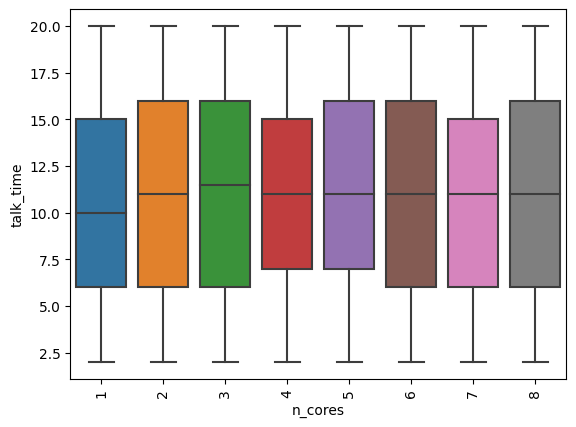


                  sum_sq      df         F    PR(>F)
C(three_g)    108.752462     1.0  3.647537  0.056295
Residual    59571.005538  1998.0       NaN       NaN


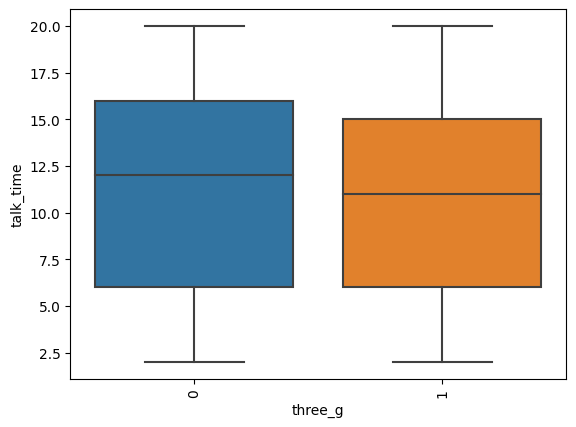


                       sum_sq      df         F    PR(>F)
C(touch_screen)     17.647828     1.0  0.591001  0.442123
Residual         59662.110172  1998.0       NaN       NaN


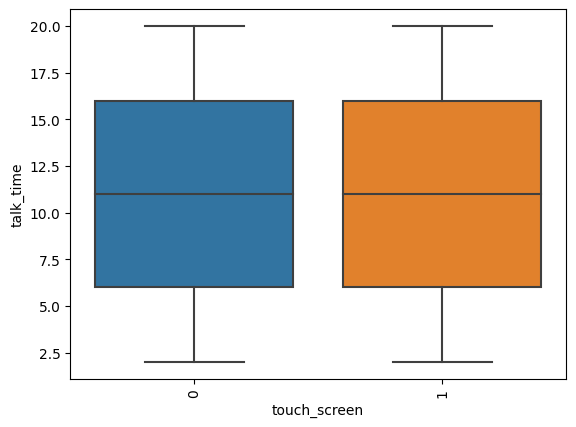


                sum_sq      df        F    PR(>F)
C(wifi)      51.951406     1.0  1.74078  0.187191
Residual  59627.806594  1998.0      NaN       NaN


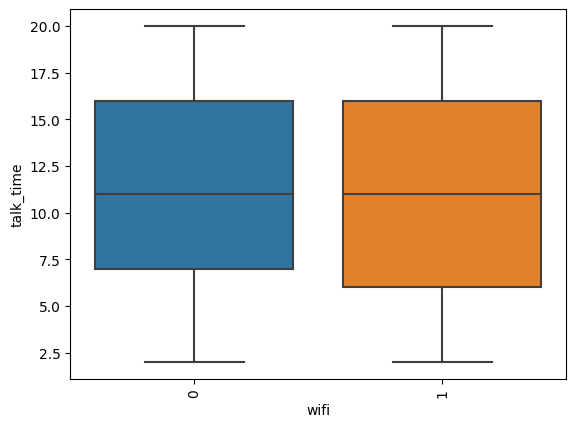

In [25]:
for i in df_in_numeric.columns:
    for j in df_in_catogory.columns:
        _analyzer.analyze_continous_vs_categories(f'{i}',f'{j}', df)
        print("\n===============================================================")

## Output Category vs Input Category 

=====Analyze of blue and price_range=====


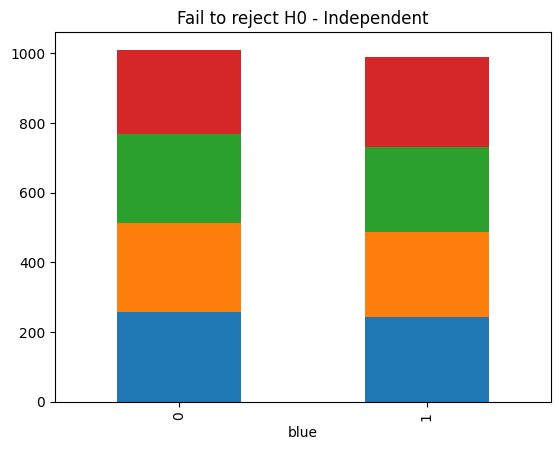

=====Analyze of dual_sim and price_range=====


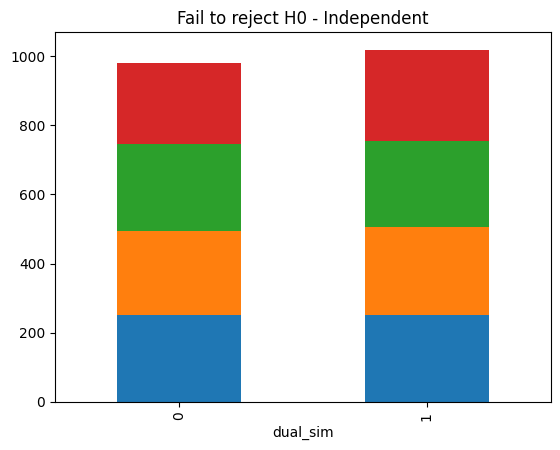

=====Analyze of four_g and price_range=====


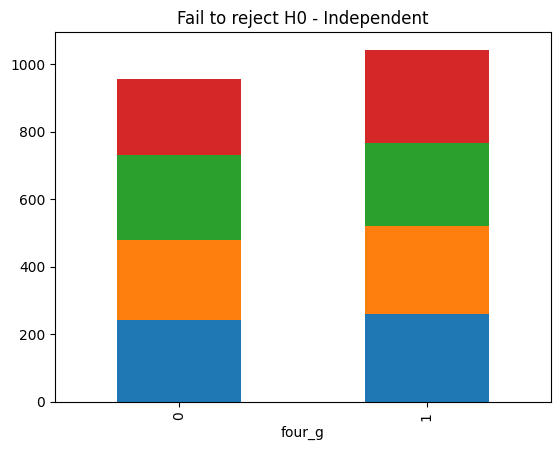

=====Analyze of n_cores and price_range=====


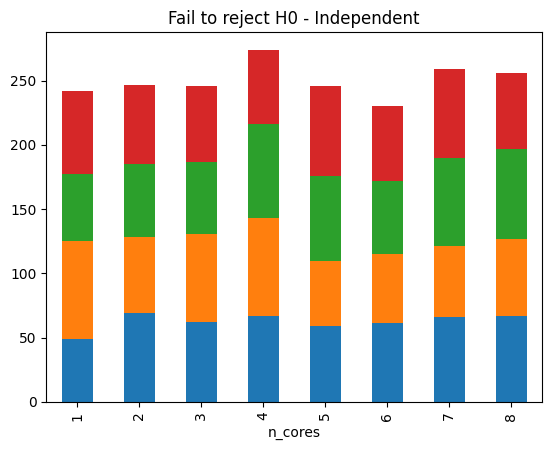

=====Analyze of three_g and price_range=====


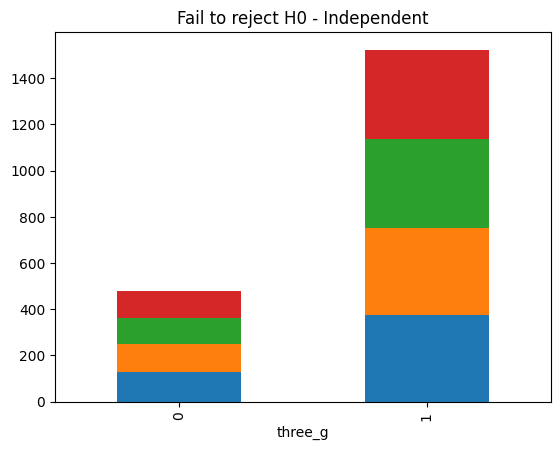

=====Analyze of touch_screen and price_range=====


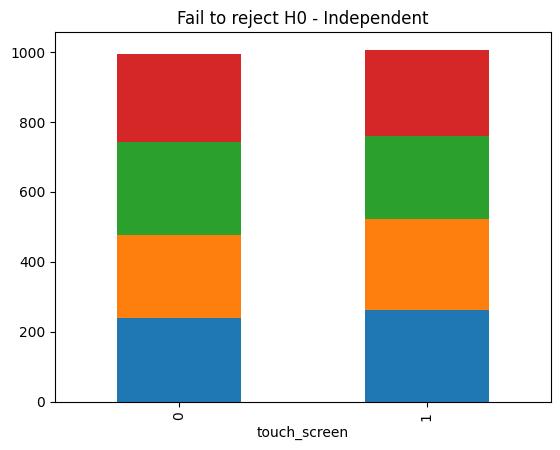

=====Analyze of wifi and price_range=====


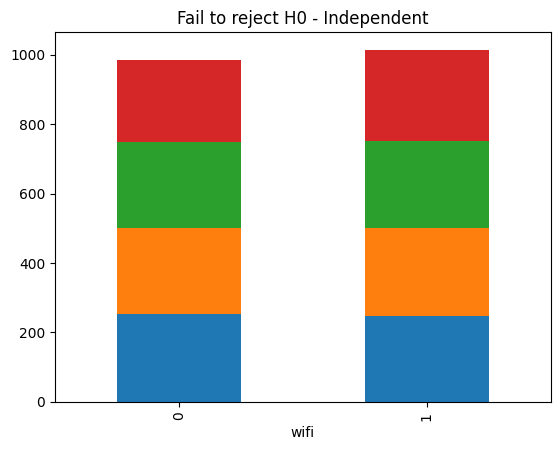

In [26]:
for i in df_in_catogory.columns:
    _analyzer.analyze_category_vs_category(i,'price_range',df)

- Output không phụ thuộc vào tất cả các biến catogory

## Output Category vs Input Continuous 

                      sum_sq      df          F        PR(>F)
C(price_range)  1.750010e+07     3.0  31.598158  5.948688e-20
Residual        3.684835e+08  1996.0        NaN           NaN


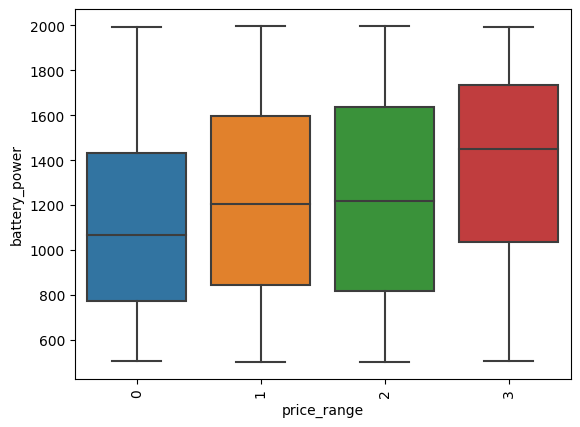


                     sum_sq      df         F    PR(>F)
C(price_range)     0.986975     3.0  0.493708  0.686675
Residual        1330.072900  1996.0       NaN       NaN


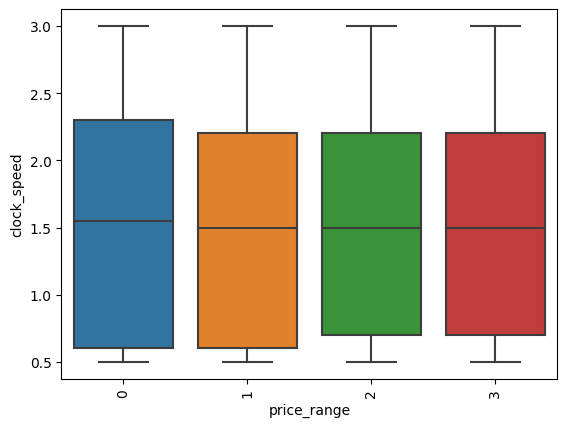


                    sum_sq      df         F    PR(>F)
C(price_range)     43.6775     3.0  0.772182  0.509504
Residual        37633.7420  1996.0       NaN       NaN


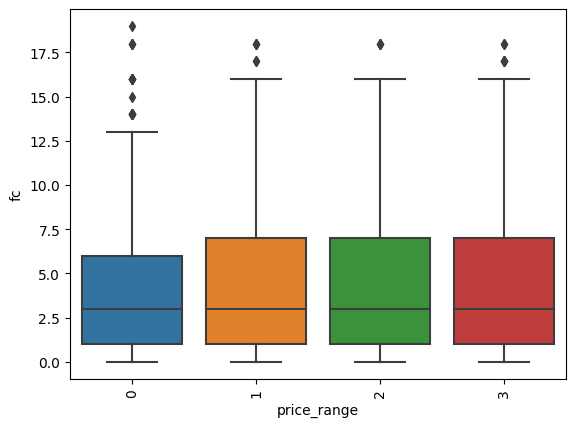


                     sum_sq      df         F    PR(>F)
C(price_range)    2879.0295     3.0  2.922996  0.032777
Residual        655325.6460  1996.0       NaN       NaN


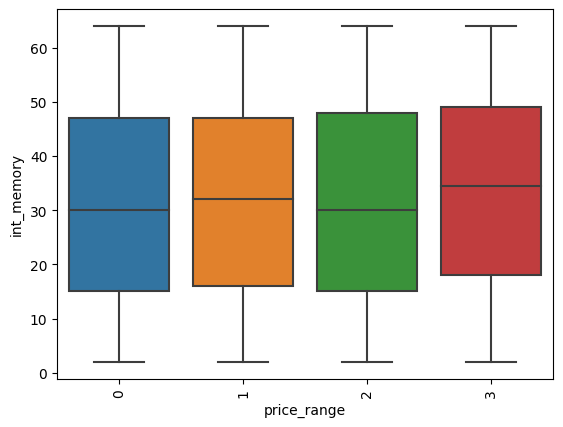


                    sum_sq      df         F    PR(>F)
C(price_range)    0.374215     3.0  1.500682  0.212459
Residual        165.909660  1996.0       NaN       NaN


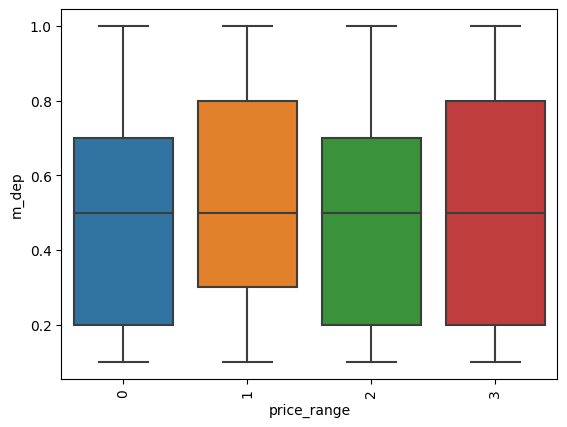


                     sum_sq      df         F    PR(>F)
C(price_range)    13460.098     3.0  3.594318  0.013117
Residual        2491557.900  1996.0       NaN       NaN


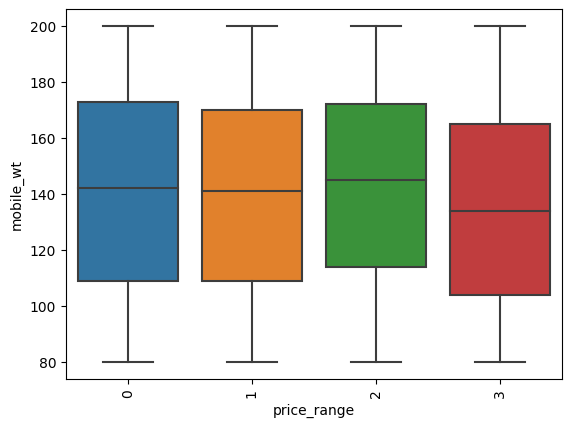


                    sum_sq      df         F    PR(>F)
C(price_range)     91.0935     3.0  0.825446  0.479749
Residual        73423.9620  1996.0       NaN       NaN


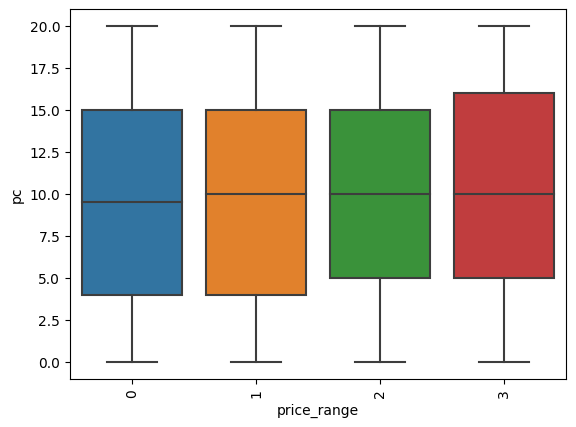


                      sum_sq      df          F        PR(>F)
C(price_range)  1.120138e+07     3.0  19.484842  1.886085e-12
Residual        3.824845e+08  1996.0        NaN           NaN


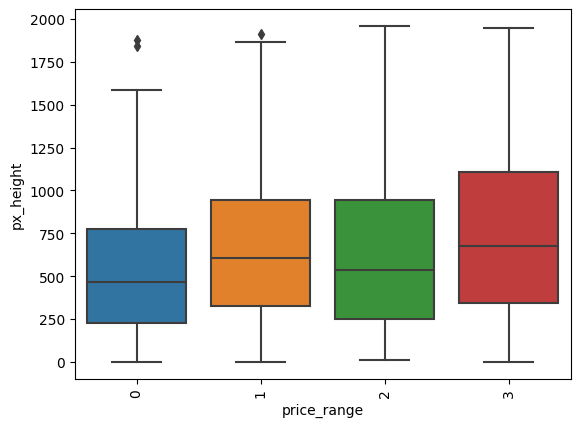


                      sum_sq      df          F        PR(>F)
C(price_range)  1.227810e+07     3.0  22.620882  2.116911e-14
Residual        3.611278e+08  1996.0        NaN           NaN


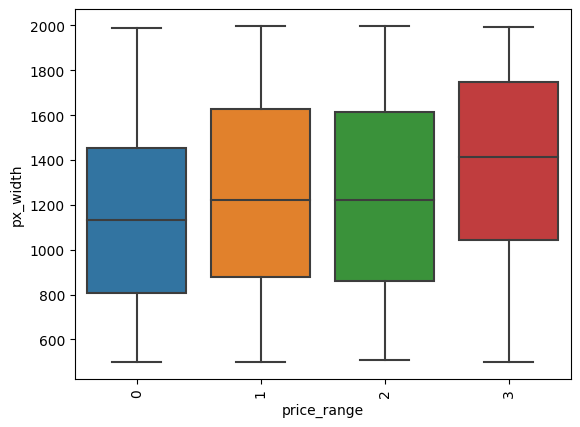


                      sum_sq      df            F  PR(>F)
C(price_range)  1.978211e+09     3.0  3520.110824     0.0
Residual        3.739000e+08  1996.0          NaN     NaN


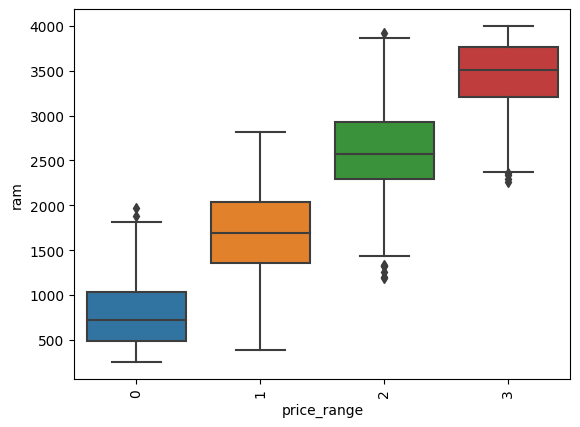


                    sum_sq      df         F   PR(>F)
C(price_range)    118.3255     3.0  2.225984  0.08325
Residual        35366.7900  1996.0       NaN      NaN


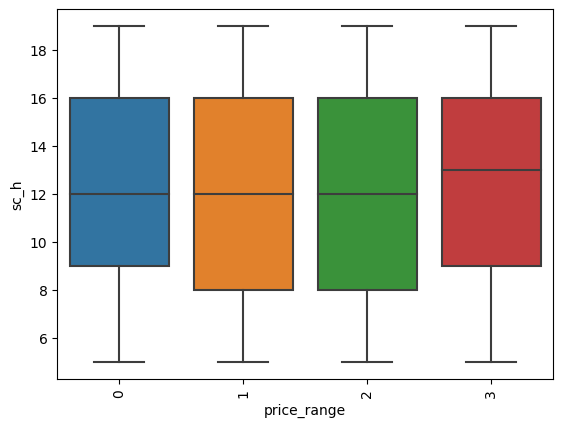


                   sum_sq      df      F    PR(>F)
C(price_range)     95.042     3.0  1.671  0.171215
Residual        37842.380  1996.0    NaN       NaN


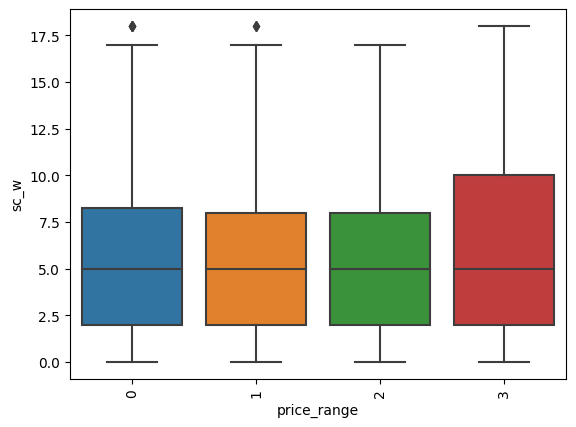


                   sum_sq      df         F    PR(>F)
C(price_range)    145.746     3.0  1.628811  0.180669
Residual        59534.012  1996.0       NaN       NaN


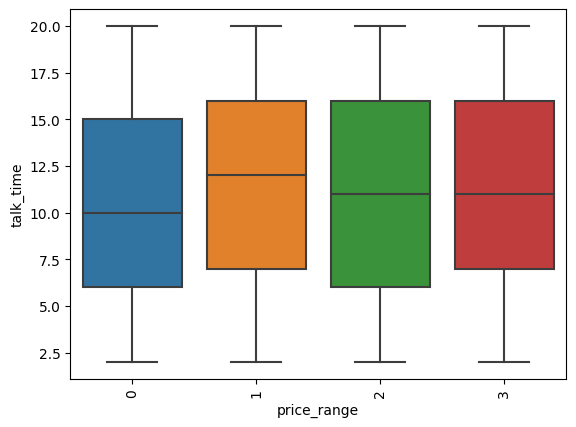

In [27]:
for i in df_in_numeric.columns:
    _analyzer.analyze_continous_vs_categories(f'{i}','price_range', df)
    print("\n===============================================================")

# Scale

In [28]:
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
fc_outlier_out = X_train[
    X_train['fc'] > (np.quantile(X_train['fc'], 0.75) + 1.5 * scipy.stats.iqr(X_train['fc']))]
y[fc_outlier_out.index].value_counts()

0    4
2    3
3    3
1    2
Name: price_range, dtype: int64

In [30]:
px_height_outlier_out = X_train[
    X_train['px_height'] > (np.quantile(X_train['px_height'], 0.75) + 1.5 * scipy.stats.iqr(X_train['px_height']))]
y[px_height_outlier_out.index].value_counts()

3    1
Name: price_range, dtype: int64

- fc, px_height có outlier k đáng kể => có thể dùng median

In [31]:
fc_upper = np.quantile(X_train['fc'], 0.75) + 1.5 * scipy.stats.iqr(X_train['fc'])
fc_outlier = X_train[X_train['fc'] > fc_upper]

In [32]:
fc_median = X_train['fc'].median()
X_train['fc'] = X_train['fc'].apply(lambda x: fc_median if x > fc_upper else x)

In [33]:
px_height_upper = np.quantile(X_train['px_height'], 0.75) + 1.5 * scipy.stats.iqr(X_train['px_height'])
px_height_outlier = X_train[X_train['px_height'] > px_height_upper]

In [34]:
px_height_median = X_train['px_height'].median()
X_train['px_height'] = X_train['px_height'].apply(lambda x: px_height_median if x > px_height_upper else x)

In [35]:
from feature_engine.encoding import OneHotEncoder

In [36]:
oh = OneHotEncoder(drop_last=True)

In [37]:
X_train['n_cores'] = X_train['n_cores'].astype('object')

In [38]:
oh_train = oh.fit_transform(X_train[['n_cores']])
oh_test = oh.transform(X_test[['n_cores']])

In [39]:
X_train = X_train.drop('n_cores', axis=1)
X_test = X_test.drop('n_cores', axis=1)

In [40]:
X_train = pd.concat([X_train, oh_train], axis=1)
X_test = pd.concat([X_test, oh_test], axis=1)

In [41]:
from sklearn.preprocessing import RobustScaler 
from feature_engine.wrappers import SklearnTransformerWrapper

In [42]:
scale = SklearnTransformerWrapper(transformer=RobustScaler(), variables=list(df_in_numeric.columns) )

In [43]:
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)
y_train_01 = y_train.copy()
y_test_01 = y_test.copy()

## Lựa chọn mô hình

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
from datetime import timedelta
from sklearn.model_selection import KFold

In [45]:
models = [
    LogisticRegression(multi_class='auto', max_iter=1000),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=100),
    SVC(kernel='rbf'),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=6),
    KNeighborsClassifier(n_neighbors=12),
]

In [46]:
def get_model_name(model):
    model_name = model.__class__.__name__
    if model_name == 'RandomForestClassifier':
        model_name += '_' + str(model.n_estimators)
    elif model_name == 'KNeighborsClassifier':
        model_name += '_' + str(model.n_neighbors)
    elif model_name == 'SVC':
        model_name += '_' + model.kernel

    return model_name

In [47]:
# Number of cross validation
kf = KFold(n_splits=10)
# Dataframe to store the model selection results
cv_df = pd.DataFrame(columns=['model', 'mean_score', 'std_score', 'accuracy_train', 'accuracy_test', 'time'])

# Loop through the models
for model in models:
    # Get the model name
    model_name = get_model_name(model)
    # Get the start time
    start_time = datetime.now()
    # Get the cross validation score for the model
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=-1)
    # Get the end time
    end_time = datetime.now()
    # Get the time taken to train the model
    time_taken = end_time - start_time
    # Get the accuracy score for the model
    model.fit(X_train, y_train)
    accuracy_train = round(model.score(X_train, y_train) * 100, 3)
    accuracy_test = round(model.score(X_test, y_test) * 100, 3)
    # Append the model name and score to the dataframe
    cv_df = pd.concat([cv_df, pd.DataFrame.from_records([  #cv_df = cv_df.append(
        {
            'model': model_name,
            'mean_score': cv_score.mean(),
            'std_score': cv_score.std(),
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'time': str(time_taken),
        }])],
                      ignore_index=True,

                      )

In [48]:
metrics = cv_df.sort_values(by = 'mean_score', ascending=False)
metrics

,model,mean_score,std_score,accuracy_train,accuracy_test,time
6,SVC_linear,0.959286,0.015000,99.214,97.667,0:00:04.639111
5,SVC_rbf,0.944286,0.015908,95.286,95.333,0:00:00.081691
7,KNeighborsClassifier_6,0.922857,0.010973,94.929,92.667,0:00:00.095348
8,KNeighborsClassifier_12,0.922857,0.019378,94.429,93.000,0:00:00.115010
4,RandomForestClassifier_100,0.858571,0.024286,100.000,85.833,0:00:00.650546
3,RandomForestClassifier_50,0.853571,0.039415,100.000,85.667,0:00:00.322696
2,DecisionTreeClassifier,0.821429,0.028571,100.000,80.500,0:00:00.081477
1,GaussianNB,0.763571,0.050452,79.429,76.333,0:00:01.162145
0,LogisticRegression,0.694286,0.022768,70.786,68.000,0:00:01.833717


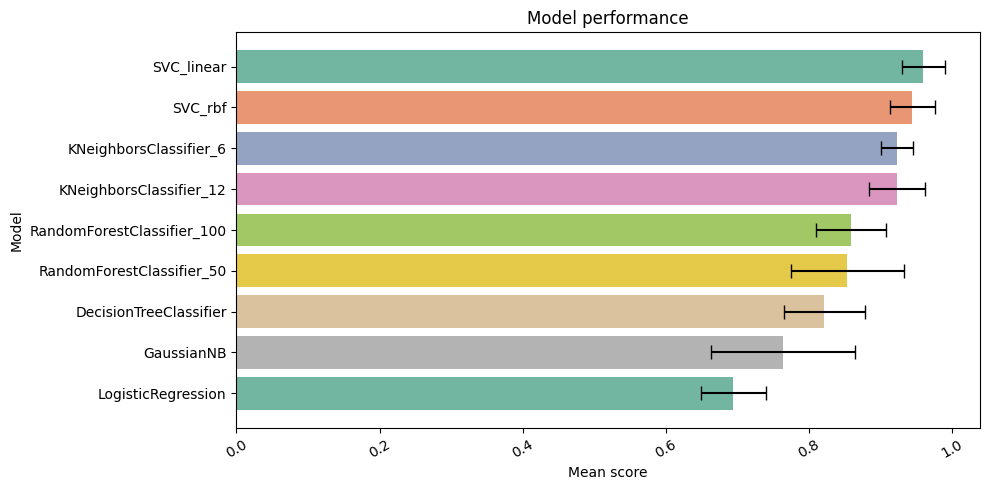

In [49]:
# Plot the model performance
plt.figure(figsize=(10, 5), tight_layout=True)
f = sns.barplot(x='mean_score', y='model', data=metrics, palette='Set2')

# Error bar
f.errorbar(x=metrics['mean_score'], y=metrics['model'], xerr=2 * metrics['std_score'], fmt='none', ecolor='black', capsize=5)

plt.xticks(rotation=30)
plt.title('Model performance')
plt.xlabel('Mean score')
plt.ylabel('Model')
plt.show()

Ưu tiên chọn mô hình SVC_Linear

## Cross Validation

In [50]:
test_size_list = [0.3, 0.25, 0.2]

In [51]:
for i in test_size_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i, random_state=42)
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_accurancy = accuracy_score(y_train, model.predict(X_train))
    test_accurancy = accuracy_score(y_test, y_pred)
    print(f"Test size: {i}, Train Accurancy: {train_accurancy}, Test Accurancy: {test_accurancy}")

Test size: 0.3, Train Accurancy: 0.9935714285714285, Test Accurancy: 0.9733333333333334
Test size: 0.25, Train Accurancy: 0.992, Test Accurancy: 0.97
Test size: 0.2, Train Accurancy: 0.98875, Test Accurancy: 0.97


In [ ]:
for test_size in test_size_list:
    accuracy_train_list = []
    accuracy_test_list = []
    for i in range(5):
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
        # Create a random SVC
        clf = SVC(kernel='linear')
        # Train the classifier
        clf.fit(X_train, y_train)
        # Make predictions
        y_pred = clf.predict(X_test)
        # Calculate the accuracy
        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, y_pred)
        # Append the accuracy to the list
        accuracy_train_list.append(train_accuracy)
        accuracy_test_list.append(test_accuracy)

    # Print the accuracy
    print(f'Test size: {test_size}, Train accuracy: {np.mean(accuracy_train_list):.3f}, Test accuracy: {np.mean(accuracy_test_list):.3f}')


Test size: 0.3, Train accuracy: 0.993, Test accuracy: 0.975


In [ ]:
# Lựa chọn test size = 0.3 (Đã chọn lại lúc tách ở đầu -> chỉ cần chạy lại model)

In [59]:
model = SVC(kernel='linear')

In [60]:
model.fit(X_train_scale, y_train_01)

SVC(kernel='linear')

In [61]:
y_pred = model.predict(X_test_scale)

In [62]:
confusion_matrix(y_test_01, y_pred)

array([[143,   8,   0,   0],
       [  8, 136,   2,   0],
       [  0,   6, 135,   7],
       [  0,   0,   1, 154]], dtype=int64)

In [63]:
print(classification_report(y_test_01, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.91      0.93      0.92       146
           2       0.98      0.91      0.94       148
           3       0.96      0.99      0.97       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

